# Performing DEG analysis (limma, R) on Pseudobulking from atlas
* Primary tumour samples only
* dataframes made previously (2025-01-13_Pseudobulking.jpynb), seperate for each DC subset and each has seperate metadata file

In [168]:
library(limma)
library(edgeR)
library(dplyr)

In [169]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

## Load data (starting with just mregDC):

In [170]:
#load data
sampleinfo <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1)
head(sampleinfo)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


In [171]:
dim(sampleinfo)

[1] 333   1

In [172]:
cts_mregDC <- read.csv("pseudobulk_mregDC_data.csv", row.names = 1)

In [173]:
head(cts_mregDC)

,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,2,0,3,3,5,0,2,5,3,4,⋯,4,1,1,1,2,0,1,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


In [174]:
dim(cts_mregDC)

[1] 15074   333

In [175]:
# set genes variables
genes <- data.frame(Symbol = row.names(cts_mregDC))

In [176]:
# create DGEList variable
y <- DGEList(counts = cts_mregDC, genes = genes)

In [177]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
FAM87B                    0                  0                  0
LINC00115                 0                  0                  0
FAM41C                    0                  0                  0
SAMD11                    0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
FAM87B                       0                    0                    0
LINC00115                    1                    1                    0
FAM41C                       0                    0                    2
SAMD11                       0                    0                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
FAM87B                       0                 0                 0
LINC00115                    0                 0                 1
FAM41C                       0                 1                 0
SAMD11                       0                 0                 0
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
FAM87B                    0                 0                 0
LINC00115                 1                 1                 0
FAM41C                    0                 1                 0
SAMD11                    0                 0                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
FAM87B                    0                 0                 0
LINC00115                 0                 0                 0
FAM41C                    1                 0                 0
SAMD11                    0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
FAM87B                    

In [178]:
dim(y)

[1] 15074   333

## Filtering:

In [179]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [180]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [181]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 10018   333

## Normalise: 

In [182]:
y <- calcNormFactors(y)

In [183]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
LINC00115                 0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
HES4                      0                  2                 12
ISG15                     0                  5                 36
AGRN                      1                  0                  2
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
LINC00115                    0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
HES4                         0                    1                    0
ISG15                        4                    2                    8
AGRN                         0                    3                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
LINC00115                    0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
HES4                         3                    2                    7
ISG15                        5                   18                   11
AGRN                         2                    1                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
LINC00115                    1                    1                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
HES4                         1                    0                    2
ISG15                        6                    4                   10
AGRN                         1                    0                    1
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
LINC00115                    0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
HES4                         0                    0                    0
ISG15                        0                    1                    2
AGRN                         1                    1                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
LINC00115                    0                 0                 1
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
HES4                         0                 0                 0
ISG15                        2                 1                 2
AGRN                         0                 1                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
LINC00115                 1                 1                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
HES4                      4                 0                 1
ISG15                    14                29                 0
AGRN                      0                 0                 1
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
LINC00115                 0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
HES4                      1                 5                 0
ISG15                    22                35                 2
AGRN                      5                 0                 1
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
LINC00115                 

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

In [184]:
library(RColorBrewer)

In [185]:
# create vector of colours for cancer types
cancer_types <- unique(sampleinfo$cancer_broadest)
colors <- brewer.pal(n = length(cancer_types), name = "Paired")

In [186]:
# set each cancer type to a colour
cancer_colors <- setNames(colors, cancer_types)

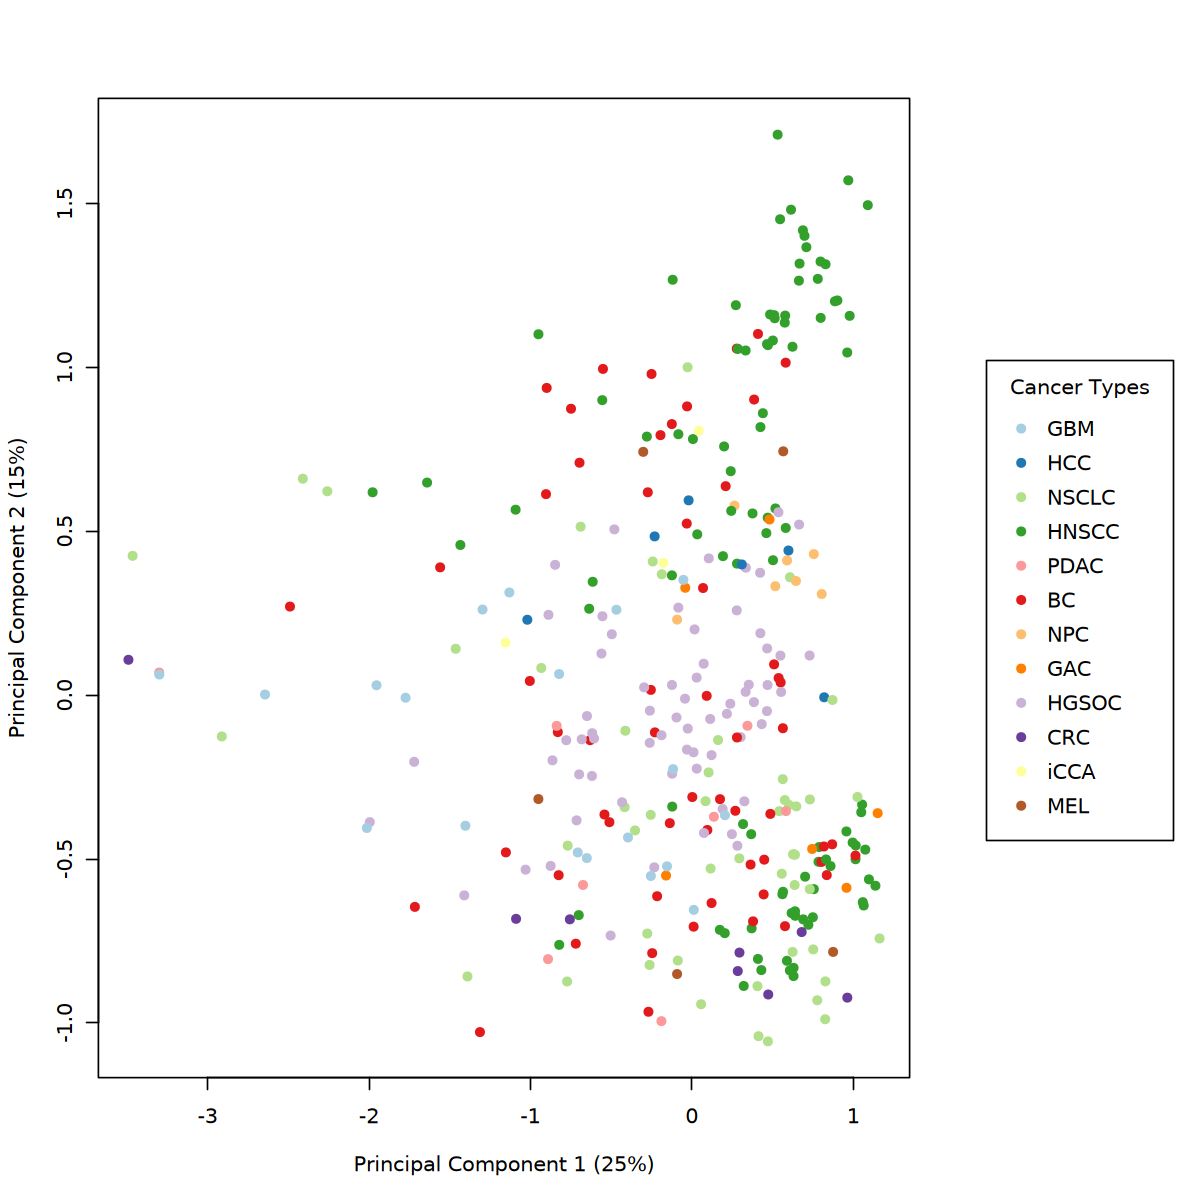

In [187]:
options(repr.plot.height=10, repr.plot.width=10)
layout(matrix(1:2, ncol = 2), widths = c(4, 1))  # Allocate space for the plot and legend

# Generate the MDS plot
plotMDS(y, 
        #labels = sampleinfo$cancer_broadest, 
        labels = NULL,
        col = cancer_colors[sampleinfo$cancer_broadest], 
        pch = 16,
        top = 50, 
        gene.selection = "common", 
        prior.count = 5)

# Add a legend
par(mar = c(0, 0, 0, 0))  # Remove margins for the legend area
plot.new()               
legend("center",                        
       legend = cancer_types,                 
       col = colors,                        
       pch = 16,                               
       title = "Cancer Types")               

# Set up model

In [188]:
# setup model
design <- model.matrix(~ 0 + cancer_broadest, data = sampleinfo)

In [189]:
colnames(design) <- c("BC","CRC","GAC","GBM","HCC","HGSOC","HNSCC","iCCA","MEL","NPC","NSCLC","PDAC")

In [190]:
head(design)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,iCCA,MEL,NPC,NSCLC,PDAC
GGSE223063_GLIO_1,0,0,0,1,0,0,0,0,0,0,0,0
GSE112271_HCC_Pt13,0,0,0,0,1,0,0,0,0,0,0,0
GSE112271_HCC_Pt14,0,0,0,0,1,0,0,0,0,0,0,0
GSE131907_LUAD_T0006,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0009,0,0,0,0,0,0,0,0,0,0,1,0


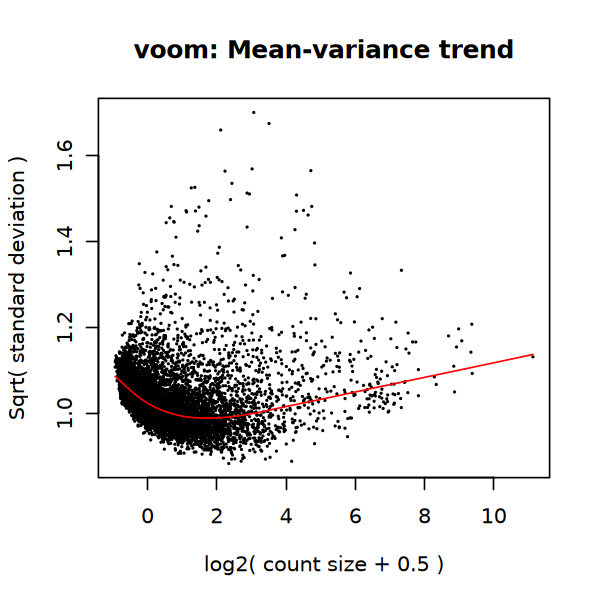

In [191]:
# voom - see here for good v bad voom plot: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html
options(repr.plot.height=5, repr.plot.width=5)
v <- voom(y, design, plot = TRUE)

In [192]:
# lmFit
fit <- lmFit(v, design)

# Contrast - compare HGSOC to the rest

In [193]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC - (BC + CRC + GAC + GBM + HCC + HNSCC + iCCA + MEL + NPC + NSCLC + PDAC), levels=design) #compare HGSOC to rest
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [194]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)

In [195]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - (BC + CRC + GAC + GBM + HCC + HNSCC + iCCA + MEL + NPC + NSCLC + PDAC)
Down                                                                            10018
NotSig                                                                              0
Up                                                                                  0

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HNRNPA2B1,HNRNPA2B1,-87.73639,8.753108,-88.78262,2.511224e-251,1.572340e-248,375.6842
EEF1D,EEF1D,-92.26300,9.415292,-86.70488,1.063161e-247,3.435724e-245,370.7252
H3F3B,H3F3B,-102.29769,10.368169,-92.42952,1.649112e-257,2.753467e-254,370.4351
HNRNPDL,HNRNPDL,-82.09574,8.128932,-82.34702,7.871859e-240,1.213235e-237,369.7347
MORF4L1,MORF4L1,-78.88622,7.994355,-80.31402,4.967002e-236,6.298661e-234,368.3684
UBE2D3,UBE2D3,-81.70880,8.312025,-80.61629,1.335648e-236,1.784070e-234,368.1282


# Contrast - compare HGSOC to each cancer type

In [196]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC-BC,HGSOC-CRC,HGSOC-GAC,HGSOC-GBM,HGSOC-HCC,HGSOC-HNSCC,HGSOC-iCCA,HGSOC-MEL,HGSOC-NPC,HGSOC-NSCLC,HGSOC-PDAC, levels=design) #compare HGSOC to every other individually
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [197]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)
tt2 <- topTable(fit2, coef=2, adjust="BH", number = Inf)
tt3 <- topTable(fit2, coef=3, adjust="BH", number = Inf)
tt4 <- topTable(fit2, coef=4, adjust="BH", number = Inf)
tt5 <- topTable(fit2, coef=5, adjust="BH", number = Inf)
tt6 <- topTable(fit2, coef=6, adjust="BH", number = Inf)
tt7 <- topTable(fit2, coef=7, adjust="BH", number = Inf)
tt8 <- topTable(fit2, coef=8, adjust="BH", number = Inf)
tt9 <- topTable(fit2, coef=9, adjust="BH", number = Inf)
tt10 <- topTable(fit2, coef=10, adjust="BH", number = Inf)
tt11 <- topTable(fit2, coef=11, adjust="BH", number = Inf)

In [198]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - BC HGSOC - CRC HGSOC - GAC HGSOC - GBM HGSOC - HCC HGSOC - HNSCC
Down          392          40         112         466          11          1339
NotSig       9196        9911        9358        9121       10002          4529
Up            430          67         548         431           5          4150
       HGSOC - iCCA HGSOC - MEL HGSOC - NPC HGSOC - NSCLC HGSOC - PDAC
Down              5          13         355           414           17
NotSig        10010        9992        7707          8921         9969
Up                3          13        1956           683           32

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,MGP,-2.303742,4.361388,-10.380095,2.546752e-22,2.551336e-18,38.94321
GRASP,GRASP,1.639361,6.554478,7.582572,2.767242e-13,1.386111e-09,19.44409
GNAS,GNAS,1.287583,7.797370,7.233899,2.728009e-12,9.109730e-09,17.28564
NBEAL1,NBEAL1,-1.469707,6.511226,-6.712711,7.210924e-11,1.805976e-07,14.21677
MUCL1,MUCL1,-1.592719,3.853041,-6.618818,1.275964e-10,2.556521e-07,13.61831
IKZF1,IKZF1,1.254608,6.820040,6.546082,1.977181e-10,3.301232e-07,13.27204


# Looking at select comparisons: HGSOC v Melanoma

In [199]:
dim(tt8)

[1] 10018     7

In [200]:
# export as csv
write.csv(tt8, "HGSOC-MEL_limma.csv", quote = FALSE, row.names = FALSE)

# Compare all contrasts

In [201]:
# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt1_up_sig <- tt1[tt1$logFC > 0.58 & tt1$adj.P.Val < 0.05, ]
tt1_dn_sig <- tt1[tt1$logFC < -0.58 & tt1$adj.P.Val < 0.05, ]
# extract only the gene names
tt1_up_sig_list <- rownames(tt1_up_sig)
tt1_dn_sig_list <- rownames(tt1_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt2_up_sig <- tt2[tt2$logFC > 0.58 & tt2$adj.P.Val < 0.05, ]
tt2_dn_sig <- tt2[tt2$logFC < -0.58 & tt2$adj.P.Val < 0.05, ]
# extract only the gene names
tt2_up_sig_list <- rownames(tt2_up_sig)
tt2_dn_sig_list <- rownames(tt2_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt3_up_sig <- tt3[tt3$logFC > 0.58 & tt3$adj.P.Val < 0.05, ]
tt3_dn_sig <- tt3[tt3$logFC < -0.58 & tt3$adj.P.Val < 0.05, ]
# extract only the gene names
tt3_up_sig_list <- rownames(tt3_up_sig)
tt3_dn_sig_list <- rownames(tt3_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt4_up_sig <- tt4[tt4$logFC > 0.58 & tt4$adj.P.Val < 0.05, ]
tt4_dn_sig <- tt4[tt4$logFC < -0.58 & tt4$adj.P.Val < 0.05, ]
# extract only the gene names
tt4_up_sig_list <- rownames(tt4_up_sig)
tt4_dn_sig_list <- rownames(tt4_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt5_up_sig <- tt5[tt5$logFC > 0.58 & tt5$adj.P.Val < 0.05, ]
tt5_dn_sig <- tt5[tt5$logFC < -0.58 & tt5$adj.P.Val < 0.05, ]
# extract only the gene names
tt5_up_sig_list <- rownames(tt5_up_sig)
tt5_dn_sig_list <- rownames(tt5_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt6_up_sig <- tt6[tt6$logFC > 0.58 & tt6$adj.P.Val < 0.05, ]
tt6_dn_sig <- tt6[tt6$logFC < -0.58 & tt6$adj.P.Val < 0.05, ]
# extract only the gene names
tt6_up_sig_list <- rownames(tt6_up_sig)
tt6_dn_sig_list <- rownames(tt6_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt7_up_sig <- tt7[tt7$logFC > 0.58 & tt7$adj.P.Val < 0.05, ]
tt7_dn_sig <- tt7[tt7$logFC < -0.58 & tt7$adj.P.Val < 0.05, ]
# extract only the gene names
tt7_up_sig_list <- rownames(tt7_up_sig)
tt7_dn_sig_list <- rownames(tt7_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt8_up_sig <- tt8[tt8$logFC > 0.58 & tt8$adj.P.Val < 0.05, ]
tt8_dn_sig <- tt8[tt8$logFC < -0.58 & tt8$adj.P.Val < 0.05, ]
# extract only the gene names
tt8_up_sig_list <- rownames(tt8_up_sig)
tt8_dn_sig_list <- rownames(tt8_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt9_up_sig <- tt9[tt9$logFC > 0.58 & tt9$adj.P.Val < 0.05, ]
tt9_dn_sig <- tt9[tt9$logFC < -0.58 & tt9$adj.P.Val < 0.05, ]
# extract only the gene names
tt9_up_sig_list <- rownames(tt9_up_sig)
tt9_dn_sig_list <- rownames(tt9_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt10_up_sig <- tt10[tt10$logFC > 0.58 & tt10$adj.P.Val < 0.05, ]
tt10_dn_sig <- tt10[tt10$logFC < -0.58 & tt10$adj.P.Val < 0.05, ]
# extract only the gene names
tt10_up_sig_list <- rownames(tt10_up_sig)
tt10_dn_sig_list <- rownames(tt10_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt11_up_sig <- tt11[tt11$logFC > 0.58 & tt11$adj.P.Val < 0.05, ]
tt11_dn_sig <- tt11[tt11$logFC < -0.58 & tt11$adj.P.Val < 0.05, ]
# extract only the gene names
tt11_up_sig_list <- rownames(tt11_up_sig)
tt11_dn_sig_list <- rownames(tt11_dn_sig)

In [202]:
tt8_up_sig_list

[1] "VMP1"    "VPS13C"  "RDX"     "GBP4"    "CHD9"    "ST3GAL1" "SMARCA5"
 [8] "PTPRC"   "NDUFC1"  "PARP14"  "NABP1"   "TXNIP"   "P2RY13"

In [203]:
tt8_dn_sig_list

[1] "PMEL"   "DECR2"  "H2AFX"  "ITM2C"  "NXF1"   "CUTA"   "RAMP1"  "CD1B"  
 [9] "FDFT1"  "EIF4A3" "NXT2"   "ID1"    "CFP"

In [204]:
# combine into dataframe
up_genes_lists <- list(HGSOC_BC_up = tt1_up_sig_list, HGSOC_CRC_up = tt2_up_sig_list, HGSOC_GAC_up = tt3_up_sig_list, HGSOC_GBM_up = tt4_up_sig_list, HGSOC_HCC_up = tt5_up_sig_list,
    HGSOC_HNSCC_up = tt6_up_sig_list, HGSOC_iCCA_up = tt7_up_sig_list, HGSOC_MEL_up = tt8_up_sig_list, HGSOC_NPC_up = tt9_up_sig_list, HGSOC_NSCLC_up = tt10_up_sig_list, HGSOC_PDAC_up = tt11_up_sig_list)

In [205]:
# combine into dataframe
down_genes_lists <- list(HGSOC_BC_dn = tt1_dn_sig_list, HGSOC_CRC_dn = tt2_dn_sig_list, HGSOC_GAC_dn = tt3_dn_sig_list, HGSOC_GBM_dn = tt4_dn_sig_list, HGSOC_HCC_dn = tt5_dn_sig_list,
    HGSOC_HNSCC_dn = tt6_dn_sig_list, HGSOC_iCCA_dn = tt7_dn_sig_list, HGSOC_MEL_dn = tt8_dn_sig_list, HGSOC_NPC_dn = tt9_dn_sig_list, HGSOC_NSCLC_dn = tt10_dn_sig_list, HGSOC_PDAC_dn = tt11_dn_sig_list)

In [206]:
# Convert to dataframe, filling missing values with NA
df_up_genes <- data.frame(lapply(up_genes_lists, function(x) { length(x) <- max(lengths(up_genes_lists)); x }))
df_down_genes <- data.frame(lapply(down_genes_lists, function(x) { length(x) <- max(lengths(down_genes_lists)); x }))

In [207]:
head(df_up_genes)

,HGSOC_BC_up,HGSOC_CRC_up,HGSOC_GAC_up,HGSOC_GBM_up,HGSOC_HCC_up,HGSOC_HNSCC_up,HGSOC_iCCA_up,HGSOC_MEL_up,HGSOC_NPC_up,HGSOC_NSCLC_up,HGSOC_PDAC_up
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GRASP,GRASP,UQCR11,NMRK1,CD81,CD81,HNRNPA3,VMP1,CD81,ARID1B,CIITA
2,GNAS,CEBPD,TAP2,PSME1,SMAP2,BHLHE41,MCL1,VPS13C,ZFPM1,MT-ND6,GNAS
3,IKZF1,CD81,DST,IL32,VMP1,TFEC,SRSF7,RDX,PRH1,CD81,GABARAPL2
4,CEBPD,CCDC88A,STIM2,TRADD,EFHD2,VAV3,NA,GBP4,LMO2,GNAS,LRRK1
5,JUND,BCLAF1,ZNF532,S100A10,ANKRD11,TRAPPC10,NA,CHD9,VEGFB,FTX,HLA-F
6,CDV3,NAMPT,NUFIP2,CYB5A,NA,JUND,NA,ST3GAL1,ZNF787,RAP1B,HLA-E


In [208]:
head(df_down_genes)

,HGSOC_BC_dn,HGSOC_CRC_dn,HGSOC_GAC_dn,HGSOC_GBM_dn,HGSOC_HCC_dn,HGSOC_HNSCC_dn,HGSOC_iCCA_dn,HGSOC_MEL_dn,HGSOC_NPC_dn,HGSOC_NSCLC_dn,HGSOC_PDAC_dn
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,MGP,TFF3,ALDOA,ZC3H11A,ALB,MTHFD2,CDK4,PMEL,ODF3B,ALDOA,IL2RA
2,NBEAL1,FXYD3,EIF4A1,PADI2,BAG3,ALDOA,COL6A1,DECR2,RPL17,RPS17,CHORDC1
3,MUCL1,NBEAL1,HIST1H2BK,ARL5A,APOA1,RPS4Y1,G6PD,H2AFX,ZNF296,SCO2,NEU1
4,AZGP1,RPS17,U2AF1,IL1B,ZFAND2A,RAMP1,COL6A2,ITM2C,ALDOA,CCL18,DNAJA4
5,TFF3,ALDOA,RAMP1,GABARAPL1,SERPINH1,TAGLN2,MRPL48,NXF1,CALCRL,SCGB3A1,MMP7
6,SERPINF2,CCDC167,POLD4,OSM,DNAJB1,NBEAL1,NA,CUTA,H2AFX,EGLN2,MRC1


In [209]:
# export to csv
write.csv(df_up_genes, "df_up_genes.csv", quote = FALSE, row.names = FALSE)
write.csv(df_down_genes, "df_down_genes.csv", quote = FALSE, row.names = FALSE)

# Performing GSEA using clusterprofiler

In [210]:
library(clusterProfiler)
library('org.Hs.eg.db')
library(enrichplot)
library(org.Hs.eg.db)
library(msigdbr)
library(dplyr)

## Gene sets I will compare: 
* inflammatory --> GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE
* regulatory --> GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE

In [211]:
# Load MSigDB GO BP terms for Homo sapiens
msig_go_bp <- msigdbr(species = "Homo sapiens", category = "C5", subcategory = "GO:BP")

In [212]:
# Extract the gene sets of interest
immune_go_terms <- msig_go_bp %>%
  filter(gs_name %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"))

In [213]:
immune_go_terms_df <- as.data.frame(immune_go_terms)

In [214]:
#extract just the columns of interest 
immune_go_clean <- immune_go_terms_df[, c("gs_name", "entrez_gene")]
colnames(immune_go_clean) <- c("term", "ENTREZID")
head(immune_go_clean)

,term,ENTREZID
,<chr>,<int>
1,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2
2,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,730249
3,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,103
4,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,196
5,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,246
6,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,259


In [215]:
head(tt1)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,MGP,-2.303742,4.361388,-10.380095,2.546752e-22,2.551336e-18,38.94321
GRASP,GRASP,1.639361,6.554478,7.582572,2.767242e-13,1.386111e-09,19.44409
GNAS,GNAS,1.287583,7.797370,7.233899,2.728009e-12,9.109730e-09,17.28564
NBEAL1,NBEAL1,-1.469707,6.511226,-6.712711,7.210924e-11,1.805976e-07,14.21677
MUCL1,MUCL1,-1.592719,3.853041,-6.618818,1.275964e-10,2.556521e-07,13.61831
IKZF1,IKZF1,1.254608,6.820040,6.546082,1.977181e-10,3.301232e-07,13.27204


In [216]:
#define a function to automate the GSEA process for each deg list
run_gsea <- function(gene_list, term2gene) {
  # 1. Sort genes by logFC (descending) to create a ranked list
  gene_list <- gene_list %>%
    arrange(desc(logFC))  

  # 2. Convert gene symbols (from "Symbol" column) to ENTREZ IDs
  gene_list$ENTREZID <- mapIds(org.Hs.eg.db, 
                               keys = gene_list$Symbol,  
                               column = "ENTREZID",      
                               keytype = "SYMBOL", 
                               multiVals = "first")  

  # 3. Remove genes without an ENTREZ ID
  gene_list <- gene_list %>% filter(!is.na(ENTREZID))

  # 4. Create a named numeric vector for GSEA
  ranked_genes <- setNames(gene_list$logFC, gene_list$ENTREZID)

  # 5. Run GSEA
  gsea_results <- GSEA(geneList = ranked_genes,   
                       TERM2GENE = term2gene,     
                       pvalueCutoff = 0.05)       

  return(gsea_results)  
}

In [217]:
#define list containing all my deg lists
deg_lists <- list(
  contrast_BC = tt1,  
  contrast_CRC = tt2,
  contrast_GAC = tt3,
  contrast_GBM = tt4,
  contrast_HCC = tt5,
  contrast_HNSCC = tt6,
  contrast_iCCA = tt7,
  contrast_MEL = tt8,
  contrast_NPC = tt9,
  contrast_NSCLC = tt10,
  contrast_PDAC = tt11
)

In [218]:
# run GSEA on all deg lists
gsea_results_list <- lapply(deg_lists, run_gsea, term2gene = immune_go_clean)

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.08% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.07%

In [219]:
# Assign contrast names to results
names(gsea_results_list) <- names(deg_lists)

In [220]:
# View GSEA results for a contrast 1
gsea_results_list[[1]]

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:9805] 1.8 1.53 1.29 1.29 1.27 ...
 - attr(*, "names")= chr [1:9805] "1052" "3727" "6696" "2778" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...2 enriched terms found
'data.frame':	2 obs. of  11 variables:
 $ ID             : chr  "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE" "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"
 $ Description    : chr  "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE" "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"
 $ setSize        : int  338 122
 $ enrichmentScore: num  0.255 0.34
 $ NES            : num  1.57 1.86
 $ pvalue         : num  1.86e-05 5.18e-05
 $ p.adjust       : num  3.73e-05 5.18e-05
 $ qvalue         : logi  NA NA
 $ rank           : int  1512 1462
 $ leading_edge   : chr  "tags=27%, list=15%, signal=24%" "tags=33%, list=15%, signal=28%"
 $ core_enrichment: chr  "975/10892/65125/3620/4179/5788/5359/5336/81844/7037/

## extract and visualise results

In [221]:
# Define the pathways of interest (immunogenic and immunoregulatory)
pathways_of_interest <- c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE", 
                           "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE")

# Initialize an empty list to store enrichment scores for each contrast
enrichment_scores_list <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_list[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}


# Combine all the results into one dataframe
enrichment_scores_df <- do.call(rbind, enrichment_scores_list)

# View the dataframe
head(enrichment_scores_df)

No enrichment for contrast: contrast_GAC

No enrichment for contrast: contrast_NPC



,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_BC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.573526,contrast_BC
contrast_BC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.863034,contrast_BC
contrast_CRC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,2.435555,contrast_CRC
contrast_CRC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2.152748,contrast_CRC
contrast_GBM,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.397609,contrast_GBM
contrast_HCC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.669580,contrast_HCC


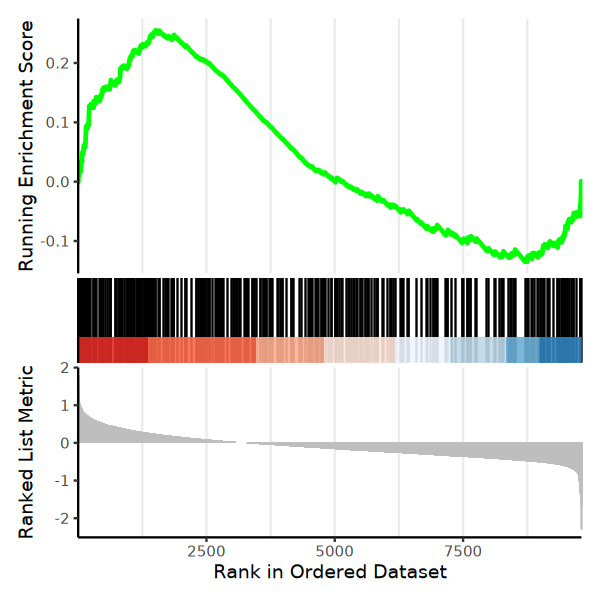

In [222]:
# Example: Plot GSEA for the first contrast for immunostimulatory pathway
gseaplot2(gsea_results_list[[1]], geneSetID = "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE")

In [223]:
# View the dataframe
enrichment_scores_df

,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_BC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.573526,contrast_BC
contrast_BC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.863034,contrast_BC
contrast_CRC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,2.435555,contrast_CRC
contrast_CRC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2.152748,contrast_CRC
contrast_GBM,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.397609,contrast_GBM
contrast_HCC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.669580,contrast_HCC
contrast_HCC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.374907,contrast_HCC
contrast_HNSCC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.511901,contrast_HNSCC
contrast_HNSCC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.478170,contrast_HNSCC


# Summary of results: 
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to BC, but the immunoregulatory pathway appears to be more strongly enriched (higher NES, 1.84v1.59)
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to GAC, but the immunostimulatory pathway appears to be more strongly enriched (higher NES, 2.39v2.14)
* only the immunoregulatory pathway is enriched in genes upregulated in HGSOC compared to GBM (NES 1.41) 
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to HCC, but the immunoregulatory pathway appears to be more strongly enriched (higher NES, 1.66v1.36)
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to HNSCC, but the immunostimulatory pathway appears to be more strongly enriched (higher NES, 1.50v1.46)
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to MEL, but the imunostimulatory pathway appears to be more strongly enriched (higher NES, 1.66v1.64)
* only the immunnostimulatory pathway is enriched in genes upregulated in HGSOC compared to NPC (NES 1.41) 
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to NSCLC, but the immunoregulatory pathway appears to be more strongly enriched (higher NES, 2.11v1.66)
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to PDAC, but the immunoregulatory pathway appears to be more strongly enriched (higher NES, 2.06v1.67)

## Visualise by heatmap

In [224]:
library(pheatmap)

In [227]:
# Create a data frame of NES scores
nes_scores_df_mregDC <- data.frame(
  contrast = c("HGSOC_vs_BC", "HGSOC_vs_CRC", "HGSOC_vs_GAC", "HGSOC_vs_GBM", "HGSOC_vs_HCC", "HGSOC_vs_HNSCC", "HGSOC_vs_iCCA", "HGSOC_vs_MEL", "HGSOC_vs_NPC", "HGSOC_vs_NSCLC", "HGSOC_vs_PDAC"),  
  immunostimulatory = c(1.566507, 2.395600, 0, 0, 1.367661, 1.502569, 0, 1.661225, 1.222040, 1.662268, 1.668936),  # Immunostimulatory NES scores for each contrast
  immunoregulatory = c(1.814032, 2.131735, 0, 1.369778, 1.664043, 1.463612, 0, 1.641790, 0, 2.105009, 2.061212)  # Immunoregulatory NES scores for each contrast
)

# Make contrast a factor
nes_scores_df_mregDC$contrast <- factor(nes_scores_df_mregDC$contrast, levels = nes_scores_df_mregDC$contrast)

rownames(nes_scores_df_mregDC) <- nes_scores_df_mregDC$contrast

In [228]:
head(nes_scores_df_mregDC)

,contrast,immunostimulatory,immunoregulatory
,<fct>,<dbl>,<dbl>
HGSOC_vs_BC,HGSOC_vs_BC,1.566507,1.814032
HGSOC_vs_CRC,HGSOC_vs_CRC,2.395600,2.131735
HGSOC_vs_GAC,HGSOC_vs_GAC,0.000000,0.000000
HGSOC_vs_GBM,HGSOC_vs_GBM,0.000000,1.369778
HGSOC_vs_HCC,HGSOC_vs_HCC,1.367661,1.664043
HGSOC_vs_HNSCC,HGSOC_vs_HNSCC,1.502569,1.463612


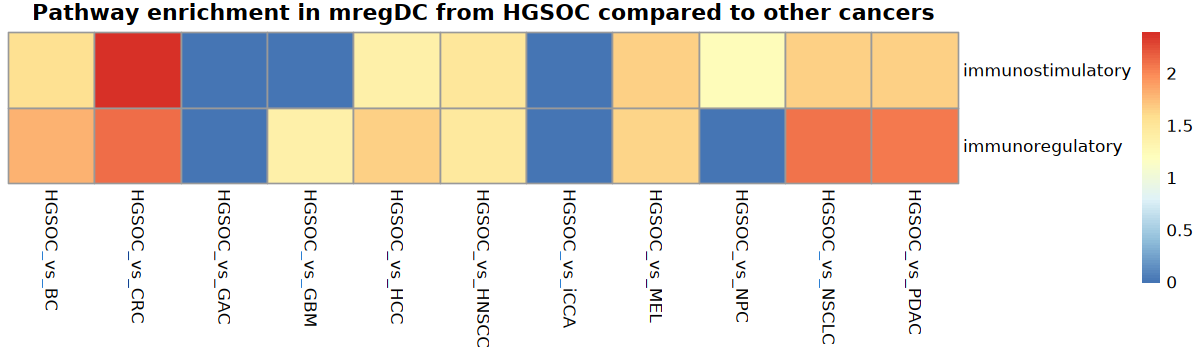

In [229]:
#create heatmap
options(repr.plot.height=3, repr.plot.width=10)
pheatmap(t(nes_scores_df[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         main = "Pathway enrichment in mregDC from HGSOC compared to other cancers"    
)

# Repeat the above for cDC1 and cDC2

## Load data (cDC1):

In [230]:
#load data
sampleinfo <- read.csv("pseudobulk_metadata_DC1.csv", row.names =1)
head(sampleinfo)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


In [231]:
dim(sampleinfo)

[1] 333   1

In [232]:
cts_DC1 <- read.csv("pseudobulk_DC1_data.csv", row.names = 1)

In [233]:
head(cts_DC1)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_50,PMID32561858_breast_51,PMID32561858_breast_52,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,1,0,0,1,0,0,0,⋯,0,0,0,0,1,1,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
NOC2L,0,0,0,2,1,0,7,1,2,1,⋯,0,5,0,3,1,2,3,2,4,1
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0


In [234]:
dim(cts_DC1)

[1] 15074   333

In [235]:
# set genes variables
genes <- data.frame(Symbol = row.names(cts_DC1))

In [236]:
# create DGEList variable
y <- DGEList(counts = cts_DC1, genes = genes)

In [237]:
dim(y)

[1] 15074   333

## Filtering:

In [238]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [239]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [240]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 10149   333

## Normalise: 

In [241]:
y <- calcNormFactors(y)

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

In [242]:
library(RColorBrewer)

In [243]:
# create vector of colours for cancer types
cancer_types <- unique(sampleinfo$cancer_broadest)
colors <- brewer.pal(n = length(cancer_types), name = "Paired")

In [244]:
# set each cancer type to a colour
cancer_colors <- setNames(colors, cancer_types)

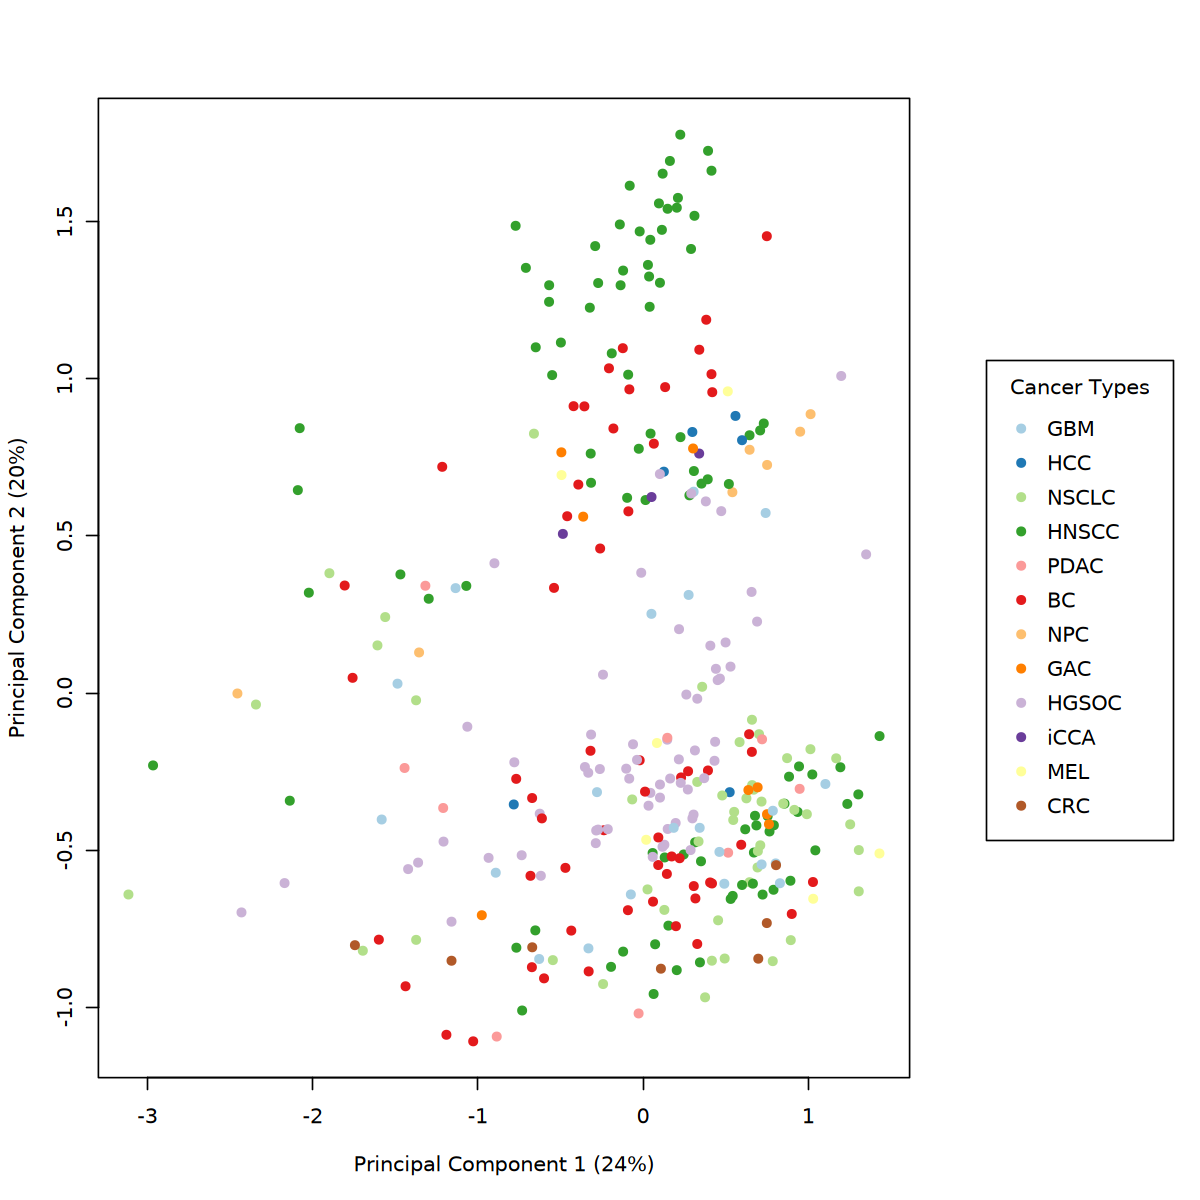

In [245]:
options(repr.plot.height=10, repr.plot.width=10)
layout(matrix(1:2, ncol = 2), widths = c(4, 1))  # Allocate space for the plot and legend

# Generate the MDS plot
plotMDS(y, 
        #labels = sampleinfo$cancer_broadest, 
        labels = NULL,
        col = cancer_colors[sampleinfo$cancer_broadest], 
        pch = 16,
        top = 50, 
        gene.selection = "common", 
        prior.count = 5)

# Add a legend
par(mar = c(0, 0, 0, 0))  # Remove margins for the legend area
plot.new()               
legend("center",                        
       legend = cancer_types,                 
       col = colors,                        
       pch = 16,                               
       title = "Cancer Types")               

# Set up model

In [246]:
# setup model
design <- model.matrix(~ 0 + cancer_broadest, data = sampleinfo)

In [247]:
colnames(design) <- c("BC","CRC","GAC","GBM","HCC","HGSOC","HNSCC","iCCA","MEL","NPC","NSCLC","PDAC")

In [248]:
head(design)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,iCCA,MEL,NPC,NSCLC,PDAC
GGSE223063_GLIO_1,0,0,0,1,0,0,0,0,0,0,0,0
GGSE223063_GLIO_3,0,0,0,1,0,0,0,0,0,0,0,0
GSE112271_HCC_Pt13,0,0,0,0,1,0,0,0,0,0,0,0
GSE112271_HCC_Pt14,0,0,0,0,1,0,0,0,0,0,0,0
GSE131907_LUAD_T0006,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,0,0,1,0


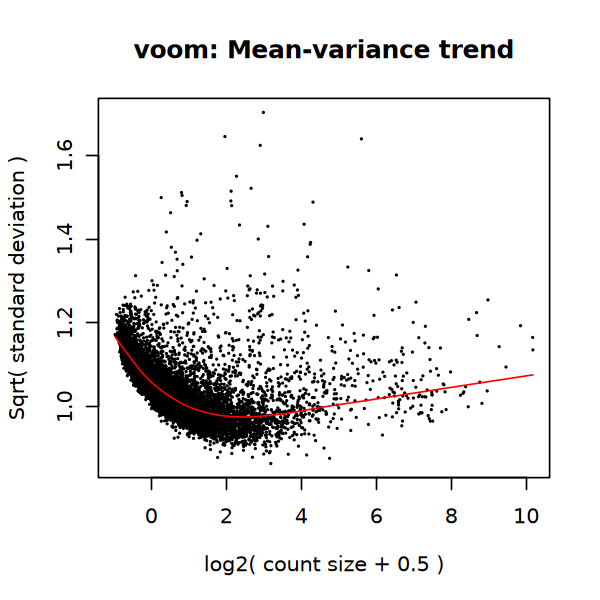

In [249]:
# voom - see here for good v bad voom plot: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html
options(repr.plot.height=5, repr.plot.width=5)
v <- voom(y, design, plot = TRUE)

In [250]:
# lmFit
fit <- lmFit(v, design)

# Contrast - compare HGSOC to each cancer type

In [251]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC-BC,HGSOC-CRC,HGSOC-GAC,HGSOC-GBM,HGSOC-HCC,HGSOC-HNSCC,HGSOC-iCCA,HGSOC-MEL,HGSOC-NPC,HGSOC-NSCLC,HGSOC-PDAC, levels=design) #compare HGSOC to every other individually
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [252]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)
tt2 <- topTable(fit2, coef=2, adjust="BH", number = Inf)
tt3 <- topTable(fit2, coef=3, adjust="BH", number = Inf)
tt4 <- topTable(fit2, coef=4, adjust="BH", number = Inf)
tt5 <- topTable(fit2, coef=5, adjust="BH", number = Inf)
tt6 <- topTable(fit2, coef=6, adjust="BH", number = Inf)
tt7 <- topTable(fit2, coef=7, adjust="BH", number = Inf)
tt8 <- topTable(fit2, coef=8, adjust="BH", number = Inf)
tt9 <- topTable(fit2, coef=9, adjust="BH", number = Inf)
tt10 <- topTable(fit2, coef=10, adjust="BH", number = Inf)
tt11 <- topTable(fit2, coef=11, adjust="BH", number = Inf)

In [253]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - BC HGSOC - CRC HGSOC - GAC HGSOC - GBM HGSOC - HCC HGSOC - HNSCC
Down         3267         250         143         124          30          1853
NotSig       6254        9863        9879        9965       10105          6701
Up            628          36         127          60          14          1595
       HGSOC - iCCA HGSOC - MEL HGSOC - NPC HGSOC - NSCLC HGSOC - PDAC
Down              7          82         163          1383          663
NotSig        10138       10035        9943          7987         9352
Up                4          32          43           779          134

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD81,CD81,2.119843,6.745554,9.756721,3.675938e-20,3.730710e-16,34.82074
NBEAL1,NBEAL1,-2.093425,6.329260,-9.291180,1.342430e-18,5.418442e-15,31.35272
MGP,MGP,-2.458251,4.055847,-9.267981,1.601668e-18,5.418442e-15,31.05069
METRNL,METRNL,1.831096,6.392245,8.797256,5.433018e-17,1.378492e-13,27.80792
JUND,JUND,1.820551,7.585725,8.650670,1.590132e-16,3.227650e-13,26.78739
GNAS,GNAS,1.427997,8.365608,8.533204,3.728725e-16,6.307139e-13,25.96828


# Compare all contrasts

In [254]:
# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt1_up_sig <- tt1[tt1$logFC > 0.58 & tt1$adj.P.Val < 0.05, ]
tt1_dn_sig <- tt1[tt1$logFC < -0.58 & tt1$adj.P.Val < 0.05, ]
# extract only the gene names
tt1_up_sig_list <- rownames(tt1_up_sig)
tt1_dn_sig_list <- rownames(tt1_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt2_up_sig <- tt2[tt2$logFC > 0.58 & tt2$adj.P.Val < 0.05, ]
tt2_dn_sig <- tt2[tt2$logFC < -0.58 & tt2$adj.P.Val < 0.05, ]
# extract only the gene names
tt2_up_sig_list <- rownames(tt2_up_sig)
tt2_dn_sig_list <- rownames(tt2_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt3_up_sig <- tt3[tt3$logFC > 0.58 & tt3$adj.P.Val < 0.05, ]
tt3_dn_sig <- tt3[tt3$logFC < -0.58 & tt3$adj.P.Val < 0.05, ]
# extract only the gene names
tt3_up_sig_list <- rownames(tt3_up_sig)
tt3_dn_sig_list <- rownames(tt3_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt4_up_sig <- tt4[tt4$logFC > 0.58 & tt4$adj.P.Val < 0.05, ]
tt4_dn_sig <- tt4[tt4$logFC < -0.58 & tt4$adj.P.Val < 0.05, ]
# extract only the gene names
tt4_up_sig_list <- rownames(tt4_up_sig)
tt4_dn_sig_list <- rownames(tt4_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt5_up_sig <- tt5[tt5$logFC > 0.58 & tt5$adj.P.Val < 0.05, ]
tt5_dn_sig <- tt5[tt5$logFC < -0.58 & tt5$adj.P.Val < 0.05, ]
# extract only the gene names
tt5_up_sig_list <- rownames(tt5_up_sig)
tt5_dn_sig_list <- rownames(tt5_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt6_up_sig <- tt6[tt6$logFC > 0.58 & tt6$adj.P.Val < 0.05, ]
tt6_dn_sig <- tt6[tt6$logFC < -0.58 & tt6$adj.P.Val < 0.05, ]
# extract only the gene names
tt6_up_sig_list <- rownames(tt6_up_sig)
tt6_dn_sig_list <- rownames(tt6_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt7_up_sig <- tt7[tt7$logFC > 0.58 & tt7$adj.P.Val < 0.05, ]
tt7_dn_sig <- tt7[tt7$logFC < -0.58 & tt7$adj.P.Val < 0.05, ]
# extract only the gene names
tt7_up_sig_list <- rownames(tt7_up_sig)
tt7_dn_sig_list <- rownames(tt7_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt8_up_sig <- tt8[tt8$logFC > 0.58 & tt8$adj.P.Val < 0.05, ]
tt8_dn_sig <- tt8[tt8$logFC < -0.58 & tt8$adj.P.Val < 0.05, ]
# extract only the gene names
tt8_up_sig_list <- rownames(tt8_up_sig)
tt8_dn_sig_list <- rownames(tt8_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt9_up_sig <- tt9[tt9$logFC > 0.58 & tt9$adj.P.Val < 0.05, ]
tt9_dn_sig <- tt9[tt9$logFC < -0.58 & tt9$adj.P.Val < 0.05, ]
# extract only the gene names
tt9_up_sig_list <- rownames(tt9_up_sig)
tt9_dn_sig_list <- rownames(tt9_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt10_up_sig <- tt10[tt10$logFC > 0.58 & tt10$adj.P.Val < 0.05, ]
tt10_dn_sig <- tt10[tt10$logFC < -0.58 & tt10$adj.P.Val < 0.05, ]
# extract only the gene names
tt10_up_sig_list <- rownames(tt10_up_sig)
tt10_dn_sig_list <- rownames(tt10_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt11_up_sig <- tt11[tt11$logFC > 0.58 & tt11$adj.P.Val < 0.05, ]
tt11_dn_sig <- tt11[tt11$logFC < -0.58 & tt11$adj.P.Val < 0.05, ]
# extract only the gene names
tt11_up_sig_list <- rownames(tt11_up_sig)
tt11_dn_sig_list <- rownames(tt11_dn_sig)

In [255]:
tt8_up_sig_list

[1] "MEF2A"   "ITGAX"   "ZNF292"  "ASB2"    "DOCK2"   "FAM135A" "VPS13C" 
 [8] "ENTPD1"  "DDI2"    "EFCAB14" "CLNK"    "TRERF1"  "CHD9"    "VHL"    
[15] "GCC2"    "ATXN2"   "CLEC12A" "PHKB"    "AAK1"    "HUWE1"   "FCHSD2" 
[22] "MT-ND3"  "CHD6"    "CCDC14"  "XCR1"    "RERE"    "PCM1"    "CRYBG3" 
[29] "RIN3"    "ADAP2"   "PALD1"   "SEL1L3"

In [256]:
tt8_dn_sig_list

[1] "ZNF296"   "ZC3H12A"  "PLK2"     "MYC"      "CDC42EP3" "ID3"     
 [7] "MAP2K3"   "CA2"      "HSPA2"    "CXCL2"    "SNAI1"    "EMP1"    
[13] "PHLDA2"   "GLA"      "ZFAND2A"  "ID1"      "NEU1"     "RPS4Y1"  
[19] "BAG3"     "DUSP10"   "PMEL"     "DNAJB1"   "NXF1"     "CKS2"    
[25] "CCR7"     "EIF4A3"   "RAD9A"    "NFKBIA"   "PPIF"     "CLEC10A" 
[31] "UBE2S"    "PAF1"     "IER3"     "TNFSF9"   "IL1B"     "SLC38A2" 
[37] "CITED2"   "ANKRD37"  "GEM"      "SERTAD1"  "ARL4A"    "GADD45B" 
[43] "ARL4D"    "HSPA1B"   "RSU1"     "ADM"      "FCER1A"   "HSPA6"   
[49] "PPP1R15A" "TNFAIP3"  "LBH"      "PHLDA1"   "NDUFAF4"  "HSPA1A"  
[55] "ICAM1"    "TUBB4B"   "TMEM115"  "RNF24"    "HES4"     "ADSL"    
[61] "PRRG4"    "BAIAP2"   "TNF"      "SYNJ2"    "MTHFD2"   "BAMBI"   
[67] "APOO"     "JMJD8"    "SLC3A2"   "ARID3A"   "SYNGR1"   "SQLE"    
[73] "HSPH1"    "NAF1"     "TBC1D7"   "EFNB1"    "CAV1"     "H2AFX"   
[79] "GNG11"    "C11orf96" "BAD"      "PIM2"

In [257]:
# combine into dataframe
up_genes_lists <- list(HGSOC_BC_up = tt1_up_sig_list, HGSOC_CRC_up = tt2_up_sig_list, HGSOC_GAC_up = tt3_up_sig_list, HGSOC_GBM_up = tt4_up_sig_list, HGSOC_HCC_up = tt5_up_sig_list,
    HGSOC_HNSCC_up = tt6_up_sig_list, HGSOC_iCCA_up = tt7_up_sig_list, HGSOC_MEL_up = tt8_up_sig_list, HGSOC_NPC_up = tt9_up_sig_list, HGSOC_NSCLC_up = tt10_up_sig_list, HGSOC_PDAC_up = tt11_up_sig_list)

In [258]:
# combine into dataframe
down_genes_lists <- list(HGSOC_BC_dn = tt1_dn_sig_list, HGSOC_CRC_dn = tt2_dn_sig_list, HGSOC_GAC_dn = tt3_dn_sig_list, HGSOC_GBM_dn = tt4_dn_sig_list, HGSOC_HCC_dn = tt5_dn_sig_list,
    HGSOC_HNSCC_dn = tt6_dn_sig_list, HGSOC_iCCA_dn = tt7_dn_sig_list, HGSOC_MEL_dn = tt8_dn_sig_list, HGSOC_NPC_dn = tt9_dn_sig_list, HGSOC_NSCLC_dn = tt10_dn_sig_list, HGSOC_PDAC_dn = tt11_dn_sig_list)

In [259]:
# Convert to dataframe, filling missing values with NA
df_up_genes <- data.frame(lapply(up_genes_lists, function(x) { length(x) <- max(lengths(up_genes_lists)); x }))
df_down_genes <- data.frame(lapply(down_genes_lists, function(x) { length(x) <- max(lengths(down_genes_lists)); x }))

In [260]:
head(df_up_genes)

,HGSOC_BC_up,HGSOC_CRC_up,HGSOC_GAC_up,HGSOC_GBM_up,HGSOC_HCC_up,HGSOC_HNSCC_up,HGSOC_iCCA_up,HGSOC_MEL_up,HGSOC_NPC_up,HGSOC_NSCLC_up,HGSOC_PDAC_up
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CD81,VIM,JUND,PRH1,CD81,JUND,MBD2,MEF2A,MT-ATP6,JUND,PSME2
2,METRNL,BOD1L1,MEF2A,TEN1,PALD1,CD81,JUND,ITGAX,MT-ND3,ARID1B,EVL
3,JUND,CDV3,IFI16,SEPHS2,ARPC1A,BOD1L1,CD81,ZNF292,GNAS,CD81,ENO1
4,GNAS,SEPHS2,AHNAK,TIFAB,PARL,METRNL,FNIP2,ASB2,MT-ND4,SEPHS2,ARPC3
5,BOD1L1,AHNAK,DDX17,PLEKHM3,GRASP,MBD2,NA,DOCK2,CD81,METRNL,S100A11
6,MAP2K2,CAST,HNRNPU,WFDC2,ZNF431,GNAS,NA,FAM135A,JUND,RAP1B,UQCR11


In [261]:
head(df_down_genes)

,HGSOC_BC_dn,HGSOC_CRC_dn,HGSOC_GAC_dn,HGSOC_GBM_dn,HGSOC_HCC_dn,HGSOC_HNSCC_dn,HGSOC_iCCA_dn,HGSOC_MEL_dn,HGSOC_NPC_dn,HGSOC_NSCLC_dn,HGSOC_PDAC_dn
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NBEAL1,FXYD3,HIST1H2BK,ZC3H11A,ALB,FAM110A,CFP,ZNF296,ODF3B,ALDOA,CCL17
2,MGP,AGR2,U2AF1,IL1B,HSPA6,ALDOA,ERGIC3,ZC3H12A,PRICKLE4,RPS17,LUM
3,ZC3H11A,TFF3,ALDOA,CDK2AP1,BAG3,RPS4Y1,POLD4,PLK2,MIR155HG,LTB,PRSS3
4,FKBP1C,NHSL2,COX16,TNFSF9,HIST1H2BK,NBEAL1,HCFC1R1,MYC,OVCA2,EGLN2,THAP2
5,H3F3C,ZC3H11A,EGLN2,ALDOA,HSPB1,ERGIC3,HYPK,CDC42EP3,FAM110A,SCO2,CDKN1C
6,RNASEH2A,ALDOA,PTPRCAP,IER3,DNAJB1,POLD4,SDR39U1,ID3,ZC3H11A,CCL18,SPARC


In [262]:
# export to csv
write.csv(df_up_genes, "df_up_genes_DC1.csv", quote = FALSE, row.names = FALSE)
write.csv(df_down_genes, "df_down_genes_DC1.csv", quote = FALSE, row.names = FALSE)

# Performing GSEA using clusterprofiler

In [263]:
library(clusterProfiler)
library('org.Hs.eg.db')
library(enrichplot)
library(org.Hs.eg.db)
library(msigdbr)
library(dplyr)

## Gene sets I will compare: 
* inflammatory --> GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE
* regulatory --> GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE

In [264]:
# Load MSigDB GO BP terms for Homo sapiens
msig_go_bp <- msigdbr(species = "Homo sapiens", category = "C5", subcategory = "GO:BP")

In [265]:
# Extract the gene sets of interest
immune_go_terms <- msig_go_bp %>%
  filter(gs_name %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"))

In [266]:
immune_go_terms_df <- as.data.frame(immune_go_terms)

In [267]:
#extract just the columns of interest 
immune_go_clean <- immune_go_terms_df[, c("gs_name", "entrez_gene")]
colnames(immune_go_clean) <- c("term", "ENTREZID")
head(immune_go_clean)

,term,ENTREZID
,<chr>,<int>
1,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2
2,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,730249
3,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,103
4,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,196
5,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,246
6,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,259


In [268]:
head(tt1)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD81,CD81,2.119843,6.745554,9.756721,3.675938e-20,3.730710e-16,34.82074
NBEAL1,NBEAL1,-2.093425,6.329260,-9.291180,1.342430e-18,5.418442e-15,31.35272
MGP,MGP,-2.458251,4.055847,-9.267981,1.601668e-18,5.418442e-15,31.05069
METRNL,METRNL,1.831096,6.392245,8.797256,5.433018e-17,1.378492e-13,27.80792
JUND,JUND,1.820551,7.585725,8.650670,1.590132e-16,3.227650e-13,26.78739
GNAS,GNAS,1.427997,8.365608,8.533204,3.728725e-16,6.307139e-13,25.96828


In [269]:
#define a function to automate the GSEA process for each deg list
run_gsea <- function(gene_list, term2gene) {
  # 1. Sort genes by logFC (descending) to create a ranked list
  gene_list <- gene_list %>%
    arrange(desc(logFC))  

  # 2. Convert gene symbols (from "Symbol" column) to ENTREZ IDs
  gene_list$ENTREZID <- mapIds(org.Hs.eg.db, 
                               keys = gene_list$Symbol,  
                               column = "ENTREZID",      
                               keytype = "SYMBOL", 
                               multiVals = "first")  

  # 3. Remove genes without an ENTREZ ID
  gene_list <- gene_list %>% filter(!is.na(ENTREZID))

  # 4. Create a named numeric vector for GSEA
  ranked_genes <- setNames(gene_list$logFC, gene_list$ENTREZID)

  # 5. Run GSEA
  gsea_results <- GSEA(geneList = ranked_genes,   
                       TERM2GENE = term2gene,     
                       pvalueCutoff = 0.05)       

  return(gsea_results)  
}

In [270]:
#define list containing all my deg lists
deg_lists <- list(
  contrast_BC = tt1,  
  contrast_CRC = tt2,
  contrast_GAC = tt3,
  contrast_GBM = tt4,
  contrast_HCC = tt5,
  contrast_HNSCC = tt6,
  contrast_iCCA = tt7,
  contrast_MEL = tt8,
  contrast_NPC = tt9,
  contrast_NSCLC = tt10,
  contrast_PDAC = tt11
)

In [271]:
# run GSEA on all deg lists
gsea_results_list <- lapply(deg_lists, run_gsea, term2gene = immune_go_clean)

'select()' returned 1:1 mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
no term enriched under specific pvalueCutoff...

'select()' returned 1:1 mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“Ther

In [272]:
# Assign contrast names to results
names(gsea_results_list) <- names(deg_lists)

## extract and visualise results

In [273]:
# Define the pathways of interest (immunogenic and immunoregulatory)
pathways_of_interest <- c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE", 
                           "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE")

# Initialize an empty list to store enrichment scores for each contrast
enrichment_scores_list <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_list[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}


# Combine all the results into one dataframe
enrichment_scores_df <- do.call(rbind, enrichment_scores_list)

# View the dataframe
head(enrichment_scores_df)

No enrichment for contrast: contrast_BC

No enrichment for contrast: contrast_CRC

No enrichment for contrast: contrast_GAC

No enrichment for contrast: contrast_HNSCC

No enrichment for contrast: contrast_iCCA

No enrichment for contrast: contrast_MEL

No enrichment for contrast: contrast_NPC

No enrichment for contrast: contrast_NSCLC

No enrichment for contrast: contrast_PDAC



,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_GBM,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,-1.621123,contrast_GBM
contrast_HCC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.379664,contrast_HCC
contrast_HCC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.401135,contrast_HCC


In [274]:
# View the dataframe
enrichment_scores_df

,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_GBM,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,-1.621123,contrast_GBM
contrast_HCC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.379664,contrast_HCC
contrast_HCC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.401135,contrast_HCC


# Summary of results (DC1): 
* immunostimulatory genes are downregulated in genes upregulated in HGSOC compared to GBM, (NES -1.62) 
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to HCC, similar NES scores

## Visualise by heatmap

In [275]:
library(pheatmap)

In [276]:
# Create a data frame of NES scores
nes_scores_df_DC1 <- data.frame(
  contrast = c("HGSOC_vs_BC", "HGSOC_vs_CRC", "HGSOC_vs_GAC", "HGSOC_vs_GBM", "HGSOC_vs_HCC", "HGSOC_vs_HNSCC", "HGSOC_vs_iCCA", "HGSOC_vs_MEL", "HGSOC_vs_NPC", "HGSOC_vs_NSCLC", "HGSOC_vs_PDAC"),  
  immunostimulatory = c(0, 0, 0, -1.615135, 1.384718, 0, 0, 0, 0, 0, 0),  # Immunostimulatory NES scores for each contrast
  immunoregulatory = c(0, 0, 0, 0, 1.396451, 0, 0, 0, 0, 0, 0)  # Immunoregulatory NES scores for each contrast
)

# Make contrast a factor
nes_scores_df_DC1$contrast <- factor(nes_scores_df_DC1$contrast, levels = nes_scores_df_DC1$contrast)

rownames(nes_scores_df_DC1) <- nes_scores_df_DC1$contrast

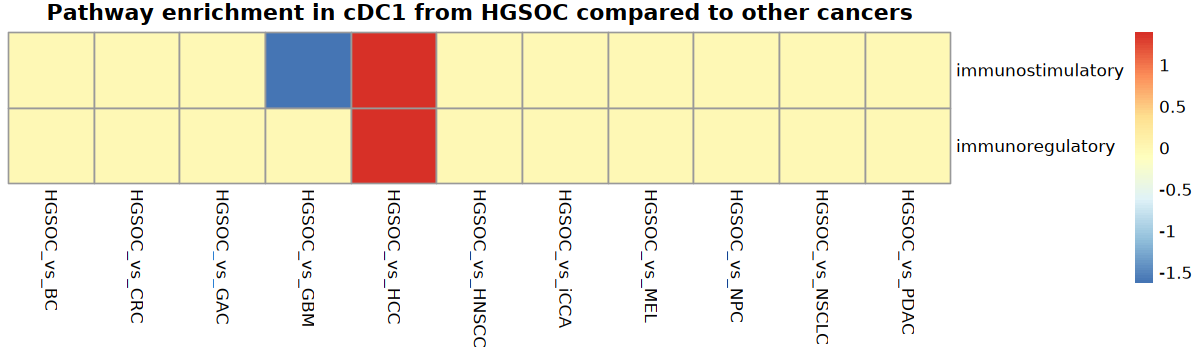

In [277]:
#create heatmap
options(repr.plot.height=3, repr.plot.width=10)
pheatmap(t(nes_scores_df_DC1[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         main = "Pathway enrichment in cDC1 from HGSOC compared to other cancers"    
)

## Load data (cDC2):

In [117]:
#load data
sampleinfo <- read.csv("pseudobulk_metadata_DC2.csv", row.names =1)
head(sampleinfo)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


In [ ]:
dim(sampleinfo)

[1] 333   1

In [118]:
cts_DC2 <- read.csv("pseudobulk_DC2_data.csv", row.names = 1)

In [119]:
head(cts_DC2)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_54,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,2,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,1,3,0,2,0,3,1,⋯,0,1,0,0,0,0,1,0,0,0
FAM41C,1,0,0,1,2,0,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
SAMD11,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
NOC2L,4,0,3,6,17,6,7,5,10,17,⋯,0,22,8,7,6,3,7,0,2,3
KLHL17,1,0,0,0,1,0,1,0,1,0,⋯,0,0,1,0,0,0,0,0,1,0


In [120]:
dim(cts_DC2)

[1] 15074   363

In [121]:
# set genes variables
genes <- data.frame(Symbol = row.names(cts_DC2))

In [122]:
# create DGEList variable
y <- DGEList(counts = cts_DC2, genes = genes)

In [123]:
dim(y)

[1] 15074   363

## Filtering:

In [124]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [125]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [126]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 11508   363

## Normalise: 

In [127]:
y <- calcNormFactors(y)

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

In [128]:
library(RColorBrewer)

In [129]:
# create vector of colours for cancer types
cancer_types <- unique(sampleinfo$cancer_broadest)
colors <- brewer.pal(n = length(cancer_types), name = "Paired")

In [130]:
# set each cancer type to a colour
cancer_colors <- setNames(colors, cancer_types)

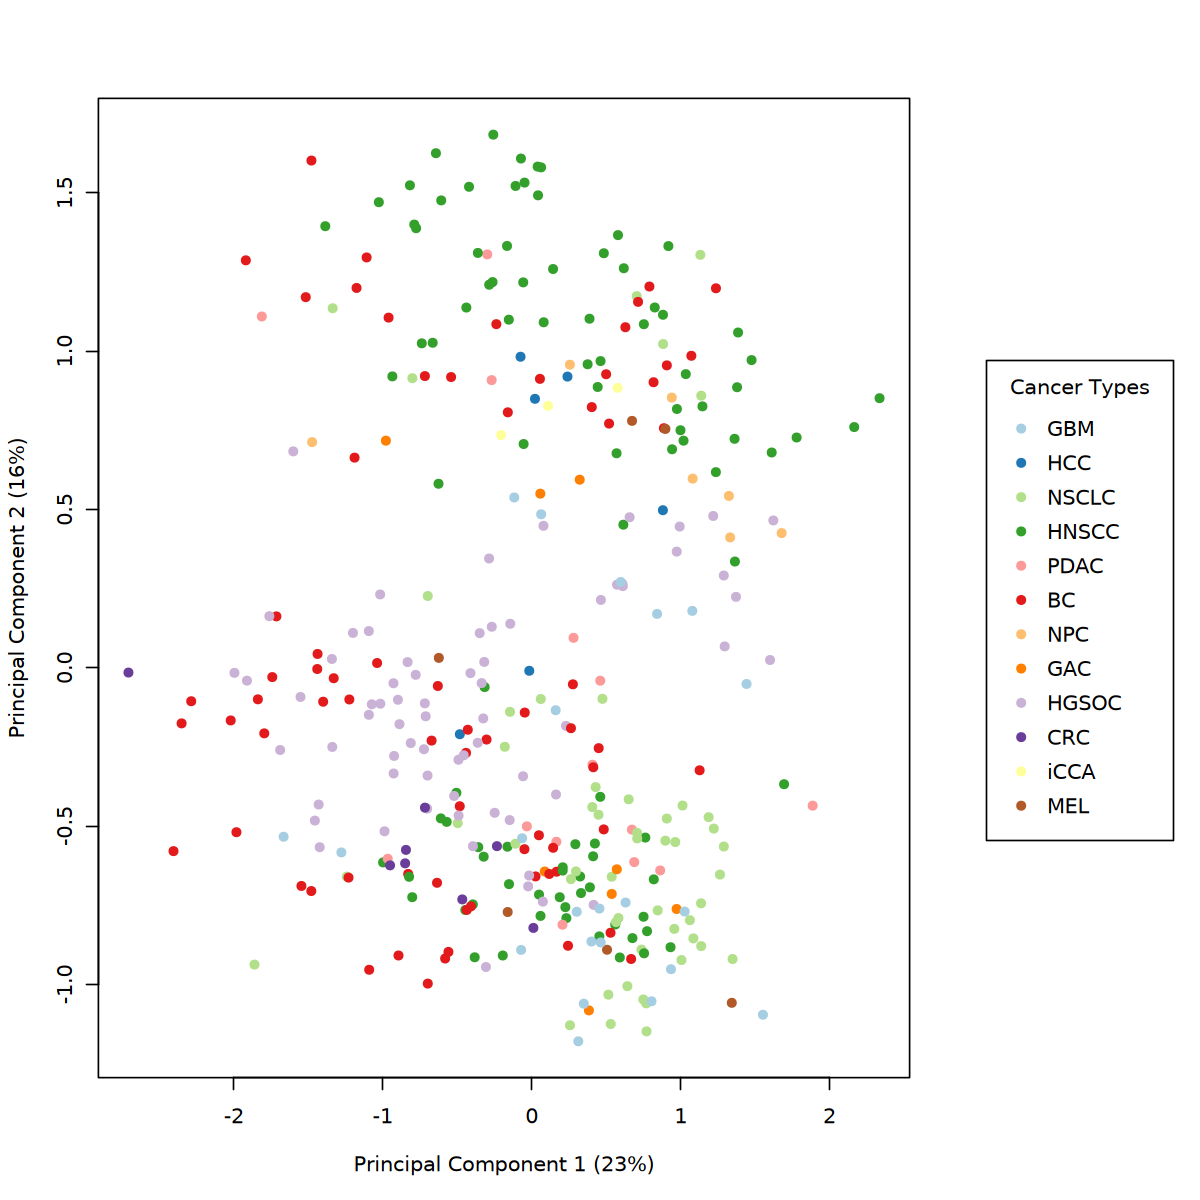

In [131]:
options(repr.plot.height=10, repr.plot.width=10)
layout(matrix(1:2, ncol = 2), widths = c(4, 1))  # Allocate space for the plot and legend

# Generate the MDS plot
plotMDS(y, 
        #labels = sampleinfo$cancer_broadest, 
        labels = NULL,
        col = cancer_colors[sampleinfo$cancer_broadest], 
        pch = 16,
        top = 50, 
        gene.selection = "common", 
        prior.count = 5)

# Add a legend
par(mar = c(0, 0, 0, 0))  # Remove margins for the legend area
plot.new()               
legend("center",                        
       legend = cancer_types,                 
       col = colors,                        
       pch = 16,                               
       title = "Cancer Types")               

# Set up model

In [132]:
# setup model
design <- model.matrix(~ 0 + cancer_broadest, data = sampleinfo)

In [133]:
colnames(design) <- c("BC","CRC","GAC","GBM","HCC","HGSOC","HNSCC","iCCA","MEL","NPC","NSCLC","PDAC")

In [134]:
head(design)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,iCCA,MEL,NPC,NSCLC,PDAC
GGSE223063_GLIO_1,0,0,0,1,0,0,0,0,0,0,0,0
GGSE223063_GLIO_3,0,0,0,1,0,0,0,0,0,0,0,0
GSE112271_HCC_Pt13,0,0,0,0,1,0,0,0,0,0,0,0
GSE112271_HCC_Pt14,0,0,0,0,1,0,0,0,0,0,0,0
GSE131907_LUAD_T0006,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,0,0,1,0


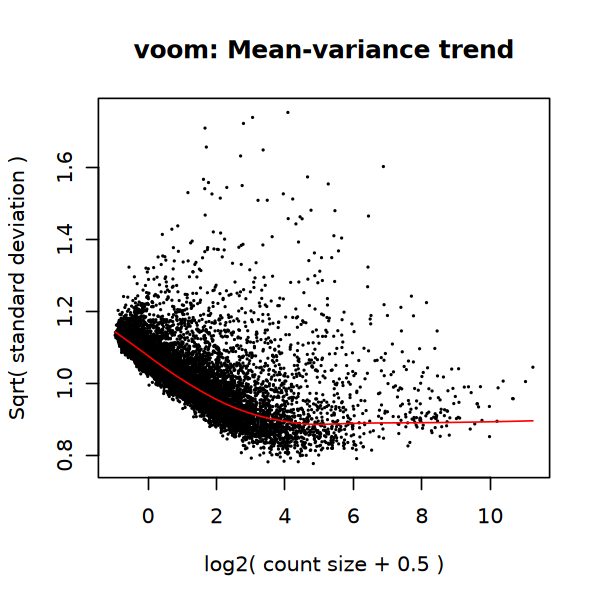

In [135]:
# voom - see here for good v bad voom plot: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html
options(repr.plot.height=5, repr.plot.width=5)
v <- voom(y, design, plot = TRUE)

In [136]:
# lmFit
fit <- lmFit(v, design)

# Contrast - compare HGSOC to each cancer type

In [137]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC-BC,HGSOC-CRC,HGSOC-GAC,HGSOC-GBM,HGSOC-HCC,HGSOC-HNSCC,HGSOC-iCCA,HGSOC-MEL,HGSOC-NPC,HGSOC-NSCLC,HGSOC-PDAC, levels=design) #compare HGSOC to every other individually
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [138]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)
tt2 <- topTable(fit2, coef=2, adjust="BH", number = Inf)
tt3 <- topTable(fit2, coef=3, adjust="BH", number = Inf)
tt4 <- topTable(fit2, coef=4, adjust="BH", number = Inf)
tt5 <- topTable(fit2, coef=5, adjust="BH", number = Inf)
tt6 <- topTable(fit2, coef=6, adjust="BH", number = Inf)
tt7 <- topTable(fit2, coef=7, adjust="BH", number = Inf)
tt8 <- topTable(fit2, coef=8, adjust="BH", number = Inf)
tt9 <- topTable(fit2, coef=9, adjust="BH", number = Inf)
tt10 <- topTable(fit2, coef=10, adjust="BH", number = Inf)
tt11 <- topTable(fit2, coef=11, adjust="BH", number = Inf)

In [139]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - BC HGSOC - CRC HGSOC - GAC HGSOC - GBM HGSOC - HCC HGSOC - HNSCC
Down         4372          93         497         739         121          2190
NotSig       5871       11117       10331       10218       11307          6638
Up           1265         298         680         551          80          2680
       HGSOC - iCCA HGSOC - MEL HGSOC - NPC HGSOC - NSCLC HGSOC - PDAC
Down             43         190         478          1651          200
NotSig        11458       11134       10744          7936        11199
Up                7         184         286          1921          109

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD81,CD81,2.000466,6.515988,10.090565,2.373403e-21,2.065873e-17,37.71425
MGP,MGP,-2.740722,3.149197,-10.038878,3.590325e-21,2.065873e-17,37.09912
PPP1R14B,PPP1R14B,1.823621,5.805436,9.871621,1.359159e-20,4.231312e-17,35.99338
GNAS,GNAS,1.404061,8.233154,9.861658,1.470738e-20,4.231312e-17,35.96374
NBEAL1,NBEAL1,-2.074568,6.231627,-9.700640,5.230446e-20,1.203839e-16,34.68249
AZGP1,AZGP1,-2.176104,2.387584,-9.419094,4.669023e-19,8.955186e-16,32.30603


# Compare all contrasts

In [142]:
# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt1_up_sig <- tt1[tt1$logFC > 0.58 & tt1$adj.P.Val < 0.05, ]
tt1_dn_sig <- tt1[tt1$logFC < -0.58 & tt1$adj.P.Val < 0.05, ]
# extract only the gene names
tt1_up_sig_list <- rownames(tt1_up_sig)
tt1_dn_sig_list <- rownames(tt1_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt2_up_sig <- tt2[tt2$logFC > 0.58 & tt2$adj.P.Val < 0.05, ]
tt2_dn_sig <- tt2[tt2$logFC < -0.58 & tt2$adj.P.Val < 0.05, ]
# extract only the gene names
tt2_up_sig_list <- rownames(tt2_up_sig)
tt2_dn_sig_list <- rownames(tt2_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt3_up_sig <- tt3[tt3$logFC > 0.58 & tt3$adj.P.Val < 0.05, ]
tt3_dn_sig <- tt3[tt3$logFC < -0.58 & tt3$adj.P.Val < 0.05, ]
# extract only the gene names
tt3_up_sig_list <- rownames(tt3_up_sig)
tt3_dn_sig_list <- rownames(tt3_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt4_up_sig <- tt4[tt4$logFC > 0.58 & tt4$adj.P.Val < 0.05, ]
tt4_dn_sig <- tt4[tt4$logFC < -0.58 & tt4$adj.P.Val < 0.05, ]
# extract only the gene names
tt4_up_sig_list <- rownames(tt4_up_sig)
tt4_dn_sig_list <- rownames(tt4_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt5_up_sig <- tt5[tt5$logFC > 0.58 & tt5$adj.P.Val < 0.05, ]
tt5_dn_sig <- tt5[tt5$logFC < -0.58 & tt5$adj.P.Val < 0.05, ]
# extract only the gene names
tt5_up_sig_list <- rownames(tt5_up_sig)
tt5_dn_sig_list <- rownames(tt5_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt6_up_sig <- tt6[tt6$logFC > 0.58 & tt6$adj.P.Val < 0.05, ]
tt6_dn_sig <- tt6[tt6$logFC < -0.58 & tt6$adj.P.Val < 0.05, ]
# extract only the gene names
tt6_up_sig_list <- rownames(tt6_up_sig)
tt6_dn_sig_list <- rownames(tt6_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt7_up_sig <- tt7[tt7$logFC > 0.58 & tt7$adj.P.Val < 0.05, ]
tt7_dn_sig <- tt7[tt7$logFC < -0.58 & tt7$adj.P.Val < 0.05, ]
# extract only the gene names
tt7_up_sig_list <- rownames(tt7_up_sig)
tt7_dn_sig_list <- rownames(tt7_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt8_up_sig <- tt8[tt8$logFC > 0.58 & tt8$adj.P.Val < 0.05, ]
tt8_dn_sig <- tt8[tt8$logFC < -0.58 & tt8$adj.P.Val < 0.05, ]
# extract only the gene names
tt8_up_sig_list <- rownames(tt8_up_sig)
tt8_dn_sig_list <- rownames(tt8_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt9_up_sig <- tt9[tt9$logFC > 0.58 & tt9$adj.P.Val < 0.05, ]
tt9_dn_sig <- tt9[tt9$logFC < -0.58 & tt9$adj.P.Val < 0.05, ]
# extract only the gene names
tt9_up_sig_list <- rownames(tt9_up_sig)
tt9_dn_sig_list <- rownames(tt9_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt10_up_sig <- tt10[tt10$logFC > 0.58 & tt10$adj.P.Val < 0.05, ]
tt10_dn_sig <- tt10[tt10$logFC < -0.58 & tt10$adj.P.Val < 0.05, ]
# extract only the gene names
tt10_up_sig_list <- rownames(tt10_up_sig)
tt10_dn_sig_list <- rownames(tt10_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt11_up_sig <- tt11[tt11$logFC > 0.58 & tt11$adj.P.Val < 0.05, ]
tt11_dn_sig <- tt11[tt11$logFC < -0.58 & tt11$adj.P.Val < 0.05, ]
# extract only the gene names
tt11_up_sig_list <- rownames(tt11_up_sig)
tt11_dn_sig_list <- rownames(tt11_dn_sig)

In [143]:
tt8_up_sig_list

[1] "PALLD"    "MYCBP2"   "NAV1"     "BHLHE41"  "SEL1L3"   "ZNF292"  
  [7] "PRRC2B"   "ASCC3"    "LILRB1"   "STX6"     "A2M"      "DOCK8"   
 [13] "AMPD3"    "ELK3"     "PRKX"     "ADAP2"    "UTRN"     "ATM"     
 [19] "CLIP1"    "EHMT1"    "TMPO"     "BOD1L1"   "MYOF"     "ATP11A"  
 [25] "USP9X"    "SLC15A3"  "SCARB2"   "GPRIN3"   "ARHGEF6"  "DENND3"  
 [31] "PHF3"     "SMC1A"    "ADAM28"   "FMR1"     "TLK2"     "ITGAM"   
 [37] "DHRS3"    "CYBB"     "XRN1"     "ALPK1"    "ITGB1"    "CNTRL"   
 [43] "LPGAT1"   "PRAM1"    "ORAI2"    "PLXNC1"   "SRGAP3"   "RAB3GAP2"
 [49] "MEF2A"    "DST"      "RFC1"     "PLXDC2"   "CWF19L2"  "PCM1"    
 [55] "DDX60"    "CTNND1"   "ABHD2"    "TSPAN14"  "TRIM14"   "EIF2AK2" 
 [61] "FUBP1"    "ATAD2"    "SSPN"     "ADD3"     "ATG7"     "CEP170"  
 [67] "TRIM56"   "SLC11A1"  "CST6"     "WDR11"    "JAK2"     "ZNF791"  
 [73] "LNPEP"    "BIRC6"    "DDI2"     "FUT8"     "PSTPIP2"  "CD226"   
 [79] "SYK"      "MAN2A1"   "BBX"      "CD2AP"    "ESCO1"    "SEMA4D"  
 [85] "CHD9"     "PTPRA"    "MACF1"    "CAMK2D"   "SSH1"     "SH3KBP1" 
 [91] "APOL6"    "HEATR5B"  "LPP"      "SCAF11"   "HERC1"    "TRPS1"   
 [97] "HEATR5A"  "SLC39A10" "NUDT3"    "TSPAN3"   "SORL1"    "GABPB2"  
[103] "CHST15"   "ATR"      "P4HA1"    "TLR6"     "VPS13C"   "TAOK1"   
[109] "PARP14"   "SLC12A6"  "MS4A4A"   "SAMD9"    "SENP7"    "MT-ND3"  
[115] "TANC2"    "GANAB"    "GLYR1"    "KDM2A"    "FGD4"     "SPP1"    
[121] "LRRC8D"   "KCTD12"   "PRKAR2A"  "ACOX1"    "VCAN"     "GAPT"    
[127] "TLR7"     "TAF1"     "ZFHX3"    "DIDO1"    "POLD3"    "KAT6A"   
[133] "ARHGAP5"  "PRKCB"    "LPIN2"    "PPP1R12A" "EIF4G3"   "PARP4"   
[139] "ANKFY1"   "FRYL"     "BARD1"    "MEF2C"    "ATP8B4"   "EPB41L2" 
[145] "ZFX"      "FMN1"     "GPX7"     "SDSL"     "RIF1"     "MT-ND6"  
[151] "SKAP2"    "IL17RA"   "AAK1"     "TNRC6B"   "CD84"     "USP33"   
[157] "AGPAT5"   "PHF8"     "PDCD11"   "HIPK3"    "AIDA"     "GTF2E2"  
[163] "PPP1R3B"  "KAT6B"    "MAP3K1"   "HIF1A"    "PIK3C2A"  "CYFIP1"  
[169] "SRFBP1"   "GTF2I"    "TMCC3"    "MBTPS1"   "MOB1B"    "NFIC"    
[175] "PJA2"     "PHKB"     "TMEM156"  "KIAA0040" "NCF1"     "ITPRIPL2"
[181] "MBD2"     "TLN1"     "XAF1"     "SP100"

In [144]:
tt8_dn_sig_list

[1] "PMEL"     "HSPA2"    "HCAR2"    "HCAR3"    "PHLDA2"   "CDC42EP3"
  [7] "TUBB2A"   "ZNF703"   "DEDD2"    "ZNF296"   "TUBB4B"   "ALOX15"  
 [13] "EIF4A3"   "ZC3H12A"  "UBE2S"    "NEU1"     "SERTAD1"  "CDKN1C"  
 [19] "FAM110A"  "RASD1"    "CITED2"   "RPS4Y1"   "ERN1"     "S100A1"  
 [25] "RABGGTA"  "BAIAP2"   "LAYN"     "RND1"     "UTF1"     "ID1"     
 [31] "NXF1"     "AAMP"     "RAB24"    "SAP18"    "MAP2K3"   "ZFAND2A" 
 [37] "ADRB2"    "CST3"     "GADD45G"  "CDK2AP1"  "H2AFX"    "PTTG1"   
 [43] "TSPAN13"  "LMNA"     "GEM"      "CIRBP"    "PPP1R15A" "MYLIP"   
 [49] "HSPA1A"   "CAV1"     "BAG3"     "HSPA1B"   "APOD"     "RRAD"    
 [55] "GZMB"     "PDLIM1"   "TESC"     "GPR137"   "SPSB3"    "TMEM217" 
 [61] "RGS14"    "PON2"     "RASGRP4"  "SLC25A33" "PTGDS"    "PTGER3"  
 [67] "SH2B2"    "PRR7"     "BAMBI"    "LRIF1"    "SLX1A"    "SEC13"   
 [73] "UGDH"     "ARL4D"    "PDLIM2"   "RBM3"     "EGR4"     "DNAJA1"  
 [79] "APOO"     "QPCT"     "TAGLN2"   "PNP"      "LILRA4"   "SQSTM1"  
 [85] "PPP1R16A" "GADD45B"  "SERTAD3"  "TCP1"     "GLA"      "LGALS3"  
 [91] "TNFSF9"   "VASN"     "NT5C"     "NINJ1"    "MID1IP1"  "HAUS7"   
 [97] "BRD2"     "DDIT3"    "PPIF"     "DNAJB1"   "DECR1"    "CD151"   
[103] "MIR22HG"  "ECE1"     "DNAJB9"   "ITM2C"    "PSMD9"    "ARL4A"   
[109] "DOK2"     "CKS2"     "FGF18"    "TXN"      "PID1"     "OAF"     
[115] "AKIRIN2"  "SMAGP"    "ARF5"     "ZNF165"   "CRIP1"    "MAGOH"   
[121] "SLC25A22" "ARF4"     "EFNB2"    "LMF2"     "TMUB1"    "TAPBPL"  
[127] "HSPA8"    "MAD2L2"   "PQBP1"    "CST7"     "LGALS2"   "CRYAB"   
[133] "HNRNPA0"  "FSCN1"    "FKBP1B"   "C1orf52"  "CDKN1A"   "DNAJA4"  
[139] "HSPE1"    "C1orf43"  "NDUFB11"  "CEACAM4"  "POLR2E"   "CFP"     
[145] "TAF8"     "HSPA1L"   "MOSPD3"   "XCL2"     "PDCL3"    "FKBP4"   
[151] "ACADS"    "MRPL18"   "SDC2"     "GNG11"    "SPNS1"    "FCER1A"  
[157] "NAB2"     "TBC1D10A" "FAM3A"    "NBEAL1"   "RNF126"   "SLC25A4" 
[163] "ZNF622"   "TRIM39"   "STX11"    "HSPB1"    "DUSP2"    "DYNLL2"  
[169] "UBB"      "ID3"      "DNAJB11"  "ADRM1"    "ZNF668"   "MCUR1"   
[175] "RHBDD2"   "LAT"      "IGFLR1"   "ERF"      "KLHL21"   "RBM42"   
[181] "EMP1"     "RNH1"     "POLD4"    "MLF2"     "HEXIM1"   "ANXA11"  
[187] "CAPN2"    "ANXA2"    "CNBP"     "RAB7A"

In [145]:
# combine into dataframe
up_genes_lists <- list(HGSOC_BC_up = tt1_up_sig_list, HGSOC_CRC_up = tt2_up_sig_list, HGSOC_GAC_up = tt3_up_sig_list, HGSOC_GBM_up = tt4_up_sig_list, HGSOC_HCC_up = tt5_up_sig_list,
    HGSOC_HNSCC_up = tt6_up_sig_list, HGSOC_iCCA_up = tt7_up_sig_list, HGSOC_MEL_up = tt8_up_sig_list, HGSOC_NPC_up = tt9_up_sig_list, HGSOC_NSCLC_up = tt10_up_sig_list, HGSOC_PDAC_up = tt11_up_sig_list)

In [146]:
# combine into dataframe
down_genes_lists <- list(HGSOC_BC_dn = tt1_dn_sig_list, HGSOC_CRC_dn = tt2_dn_sig_list, HGSOC_GAC_dn = tt3_dn_sig_list, HGSOC_GBM_dn = tt4_dn_sig_list, HGSOC_HCC_dn = tt5_dn_sig_list,
    HGSOC_HNSCC_dn = tt6_dn_sig_list, HGSOC_iCCA_dn = tt7_dn_sig_list, HGSOC_MEL_dn = tt8_dn_sig_list, HGSOC_NPC_dn = tt9_dn_sig_list, HGSOC_NSCLC_dn = tt10_dn_sig_list, HGSOC_PDAC_dn = tt11_dn_sig_list)

In [147]:
# Convert to dataframe, filling missing values with NA
df_up_genes <- data.frame(lapply(up_genes_lists, function(x) { length(x) <- max(lengths(up_genes_lists)); x }))
df_down_genes <- data.frame(lapply(down_genes_lists, function(x) { length(x) <- max(lengths(down_genes_lists)); x }))

In [148]:
head(df_up_genes)

,HGSOC_BC_up,HGSOC_CRC_up,HGSOC_GAC_up,HGSOC_GBM_up,HGSOC_HCC_up,HGSOC_HNSCC_up,HGSOC_iCCA_up,HGSOC_MEL_up,HGSOC_NPC_up,HGSOC_NSCLC_up,HGSOC_PDAC_up
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CD81,GRASP,UQCR11,TEN1,ACBD3,TCF4,PPP1R14B,PALLD,METRNL,SEPHS2,SMC1A
2,PPP1R14B,CD81,MEF2A,SEPHS2,RGPD5,BOD1L1,MBD2,MYCBP2,CD81,BOD1L1,SAMHD1
3,GNAS,PPP1R14B,PPP6R1,PRH1,PPP1R14B,GNAS,UBE2M,NAV1,GNAS,RAP1B,PLCG2
4,METRNL,DDX5,TCF4,IFIT1,CD81,ITGAM,ZNRF2,BHLHE41,RNPEPL1,ZNRF2,PARP14
5,CDV3,GNAS,RUFY3,ATOX1,ZFPM1,METRNL,PARL,SEL1L3,MALAT1,ARID1B,RUFY3
6,MAP2K2,PARP14,MYCBP2,WFDC2,PPP6R1,JUND,CREB3,ZNF292,JUND,MT-ND6,LPIN2


In [149]:
head(df_down_genes)

,HGSOC_BC_dn,HGSOC_CRC_dn,HGSOC_GAC_dn,HGSOC_GBM_dn,HGSOC_HCC_dn,HGSOC_HNSCC_dn,HGSOC_iCCA_dn,HGSOC_MEL_dn,HGSOC_NPC_dn,HGSOC_NSCLC_dn,HGSOC_PDAC_dn
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,MGP,TFF3,MATR3,ZC3H11A,ALB,FAM110A,NAPSA,PMEL,PRICKLE4,SCO2,TFF1
2,NBEAL1,FXYD3,U2AF1,PADI2,APOA1,SYNGR2,RMRP,HSPA2,ODF3B,ALDOA,DEDD2
3,AZGP1,MYL9,HIST1H2BK,AC159540.1,HES1,ACP5,HSPA6,HCAR2,HSPA2,CCL18,DDIT3
4,MUCL1,S100P,DNASE1L3,RAD50,RNASEH2A,PFN1,NRROS,HCAR3,ZC3H11A,RPS17,ID3
5,HCAR2,LGALS4,PMP22,CHN2,HSPB1,RHOG,BAG3,PHLDA2,CALCRL,RAD50,TUBB2A
6,CALML5,ZC3H11A,EGLN2,ATXN7,HSPA6,ALDOA,UBL7,CDC42EP3,SNAI1,MKKS,RPS4Y1


In [150]:
# export to csv
write.csv(df_up_genes, "df_up_genes_DC2.csv", quote = FALSE, row.names = FALSE)
write.csv(df_down_genes, "df_down_genes_DC2.csv", quote = FALSE, row.names = FALSE)

# Performing GSEA using clusterprofiler

In [151]:
library(clusterProfiler)
library('org.Hs.eg.db')
library(enrichplot)
library(org.Hs.eg.db)
library(msigdbr)
library(dplyr)

## Gene sets I will compare: 
* inflammatory --> GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE
* regulatory --> GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE

In [152]:
# Load MSigDB GO BP terms for Homo sapiens
msig_go_bp <- msigdbr(species = "Homo sapiens", category = "C5", subcategory = "GO:BP")

In [153]:
# Extract the gene sets of interest
immune_go_terms <- msig_go_bp %>%
  filter(gs_name %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"))

In [154]:
immune_go_terms_df <- as.data.frame(immune_go_terms)

In [155]:
#extract just the columns of interest 
immune_go_clean <- immune_go_terms_df[, c("gs_name", "entrez_gene")]
colnames(immune_go_clean) <- c("term", "ENTREZID")
head(immune_go_clean)

,term,ENTREZID
,<chr>,<int>
1,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2
2,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,730249
3,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,103
4,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,196
5,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,246
6,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,259


In [156]:
head(tt1)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD81,CD81,2.000466,6.515988,10.090565,2.373403e-21,2.065873e-17,37.71425
MGP,MGP,-2.740722,3.149197,-10.038878,3.590325e-21,2.065873e-17,37.09912
PPP1R14B,PPP1R14B,1.823621,5.805436,9.871621,1.359159e-20,4.231312e-17,35.99338
GNAS,GNAS,1.404061,8.233154,9.861658,1.470738e-20,4.231312e-17,35.96374
NBEAL1,NBEAL1,-2.074568,6.231627,-9.700640,5.230446e-20,1.203839e-16,34.68249
AZGP1,AZGP1,-2.176104,2.387584,-9.419094,4.669023e-19,8.955186e-16,32.30603


In [157]:
#define a function to automate the GSEA process for each deg list
run_gsea <- function(gene_list, term2gene) {
  # 1. Sort genes by logFC (descending) to create a ranked list
  gene_list <- gene_list %>%
    arrange(desc(logFC))  

  # 2. Convert gene symbols (from "Symbol" column) to ENTREZ IDs
  gene_list$ENTREZID <- mapIds(org.Hs.eg.db, 
                               keys = gene_list$Symbol,  
                               column = "ENTREZID",      
                               keytype = "SYMBOL", 
                               multiVals = "first")  

  # 3. Remove genes without an ENTREZ ID
  gene_list <- gene_list %>% filter(!is.na(ENTREZID))

  # 4. Create a named numeric vector for GSEA
  ranked_genes <- setNames(gene_list$logFC, gene_list$ENTREZID)

  # 5. Run GSEA
  gsea_results <- GSEA(geneList = ranked_genes,   
                       TERM2GENE = term2gene,     
                       pvalueCutoff = 0.05)       

  return(gsea_results)  
}

In [158]:
#define list containing all my deg lists
deg_lists <- list(
  contrast_BC = tt1,  
  contrast_CRC = tt2,
  contrast_GAC = tt3,
  contrast_GBM = tt4,
  contrast_HCC = tt5,
  contrast_HNSCC = tt6,
  contrast_iCCA = tt7,
  contrast_MEL = tt8,
  contrast_NPC = tt9,
  contrast_NSCLC = tt10,
  contrast_PDAC = tt11
)

In [159]:
# run GSEA on all deg lists
gsea_results_list <- lapply(deg_lists, run_gsea, term2gene = immune_go_clean)

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
no term enriched under specific pvalueCutoff...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.04% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There a

In [160]:
# Assign contrast names to results
names(gsea_results_list) <- names(deg_lists)

## extract and visualise results

In [161]:
# Define the pathways of interest (immunogenic and immunoregulatory)
pathways_of_interest <- c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE", 
                           "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE")

# Initialize an empty list to store enrichment scores for each contrast
enrichment_scores_list <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_list[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}


# Combine all the results into one dataframe
enrichment_scores_df <- do.call(rbind, enrichment_scores_list)

# View the dataframe
head(enrichment_scores_df)

No enrichment for contrast: contrast_BC

No enrichment for contrast: contrast_GAC

No enrichment for contrast: contrast_GBM

No enrichment for contrast: contrast_HCC

No enrichment for contrast: contrast_HNSCC

No enrichment for contrast: contrast_iCCA

No enrichment for contrast: contrast_MEL

No enrichment for contrast: contrast_NPC

No enrichment for contrast: contrast_NSCLC



,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_CRC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.989711,contrast_CRC
contrast_CRC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.936283,contrast_CRC
contrast_PDAC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.778275,contrast_PDAC
contrast_PDAC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.326228,contrast_PDAC


In [162]:
# View the dataframe
enrichment_scores_df

,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_CRC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.989711,contrast_CRC
contrast_CRC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.936283,contrast_CRC
contrast_PDAC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.778275,contrast_PDAC
contrast_PDAC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.326228,contrast_PDAC


# Summary of results (DC2): 
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to CRC, immunostimulatory is more enriched (NES 1.99v1.94)
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to PDAC, immunoregulatory is more enriched (NES 1.78v1.33)

## Visualise by heatmap

In [163]:
library(pheatmap)

In [166]:
# Create a data frame of NES scores
nes_scores_df_DC2 <- data.frame(
  contrast = c("HGSOC_vs_BC", "HGSOC_vs_CRC", "HGSOC_vs_GAC", "HGSOC_vs_GBM", "HGSOC_vs_HCC", "HGSOC_vs_HNSCC", "HGSOC_vs_iCCA", "HGSOC_vs_MEL", "HGSOC_vs_NPC", "HGSOC_vs_NSCLC", "HGSOC_vs_PDAC"),  
  immunostimulatory = c(0, 1.989711, 0, 0, 0, 0, 0, 0, 0, 0, 1.326228),  # Immunostimulatory NES scores for each contrast
  immunoregulatory = c(0, 1.936283, 0, 0, 0, 0, 0, 0, 0, 0, 1.778275)  # Immunoregulatory NES scores for each contrast
)

# Make contrast a factor
nes_scores_df_DC2$contrast <- factor(nes_scores_df$contrast, levels = nes_scores_df$contrast)

rownames(nes_scores_df_DC2) <- nes_scores_df$contrast

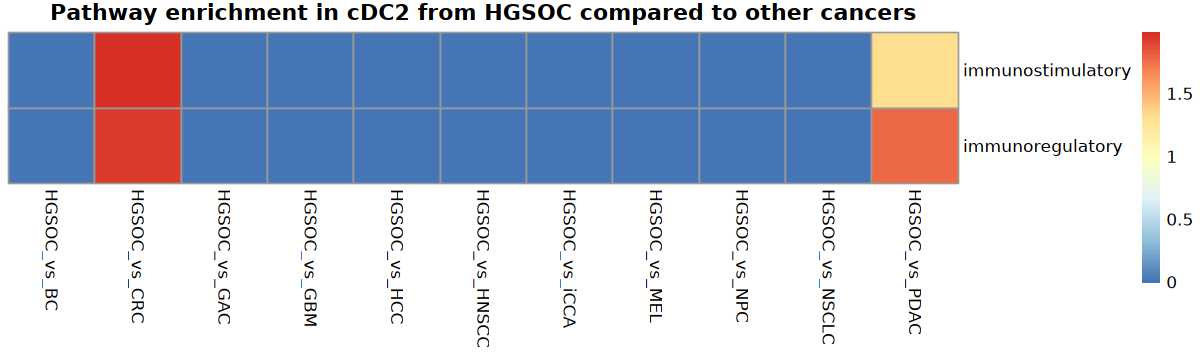

In [167]:
#create heatmap
options(repr.plot.height=3, repr.plot.width=10)
pheatmap(t(nes_scores_df_DC2[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         main = "Pathway enrichment in cDC2 from HGSOC compared to other cancers"    
)

# compare all heatmaps

In [278]:
# Create a data frame of NES scores
nes_scores_df_mregDC <- data.frame(
  contrast = c("HGSOC_vs_BC", "HGSOC_vs_CRC", "HGSOC_vs_GAC", "HGSOC_vs_GBM", "HGSOC_vs_HCC", "HGSOC_vs_HNSCC", "HGSOC_vs_iCCA", "HGSOC_vs_MEL", "HGSOC_vs_NPC", "HGSOC_vs_NSCLC", "HGSOC_vs_PDAC"),  
  immunostimulatory = c(1.566507, 2.395600, 0, 0, 1.367661, 1.502569, 0, 1.661225, 1.222040, 1.662268, 1.668936),  # Immunostimulatory NES scores for each contrast
  immunoregulatory = c(1.814032, 2.131735, 0, 1.369778, 1.664043, 1.463612, 0, 1.641790, 0, 2.105009, 2.061212)  # Immunoregulatory NES scores for each contrast
)

# Make contrast a factor
nes_scores_df_mregDC$contrast <- factor(nes_scores_df_mregDC$contrast, levels = nes_scores_df_mregDC$contrast)

rownames(nes_scores_df_mregDC) <- nes_scores_df_mregDC$contrast

In [279]:
# Create a data frame of NES scores
nes_scores_df_DC1 <- data.frame(
  contrast = c("HGSOC_vs_BC", "HGSOC_vs_CRC", "HGSOC_vs_GAC", "HGSOC_vs_GBM", "HGSOC_vs_HCC", "HGSOC_vs_HNSCC", "HGSOC_vs_iCCA", "HGSOC_vs_MEL", "HGSOC_vs_NPC", "HGSOC_vs_NSCLC", "HGSOC_vs_PDAC"),  
  immunostimulatory = c(0, 0, 0, -1.615135, 1.384718, 0, 0, 0, 0, 0, 0),  # Immunostimulatory NES scores for each contrast
  immunoregulatory = c(0, 0, 0, 0, 1.396451, 0, 0, 0, 0, 0, 0)  # Immunoregulatory NES scores for each contrast
)

# Make contrast a factor
nes_scores_df_DC1$contrast <- factor(nes_scores_df_DC1$contrast, levels = nes_scores_df_DC1$contrast)

rownames(nes_scores_df_DC1) <- nes_scores_df_DC1$contrast

In [280]:
# Create a data frame of NES scores
nes_scores_df_DC2 <- data.frame(
  contrast = c("HGSOC_vs_BC", "HGSOC_vs_CRC", "HGSOC_vs_GAC", "HGSOC_vs_GBM", "HGSOC_vs_HCC", "HGSOC_vs_HNSCC", "HGSOC_vs_iCCA", "HGSOC_vs_MEL", "HGSOC_vs_NPC", "HGSOC_vs_NSCLC", "HGSOC_vs_PDAC"),  
  immunostimulatory = c(0, 1.989711, 0, 0, 0, 0, 0, 0, 0, 0, 1.326228),  # Immunostimulatory NES scores for each contrast
  immunoregulatory = c(0, 1.936283, 0, 0, 0, 0, 0, 0, 0, 0, 1.778275)  # Immunoregulatory NES scores for each contrast
)

# Make contrast a factor
nes_scores_df_DC2$contrast <- factor(nes_scores_df$contrast, levels = nes_scores_df$contrast)

rownames(nes_scores_df_DC2) <- nes_scores_df$contrast

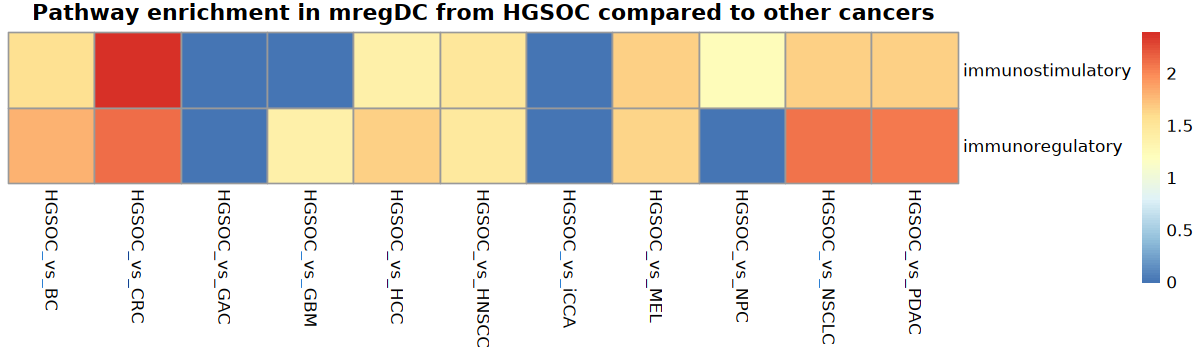

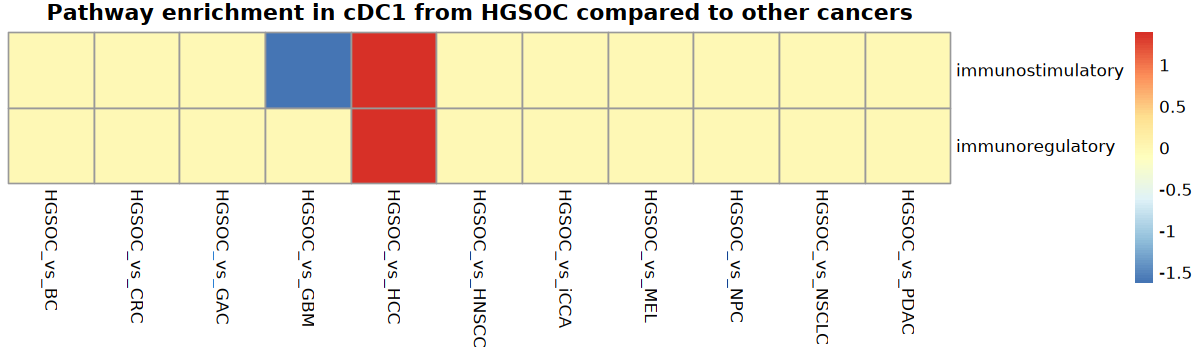

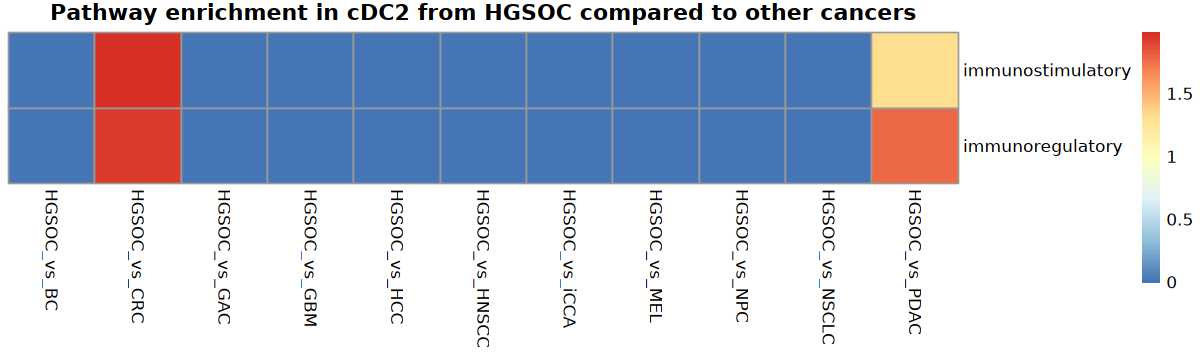

In [290]:
pheatmap(t(nes_scores_df_mregDC[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         main = "Pathway enrichment in mregDC from HGSOC compared to other cancers"    
)

pheatmap(t(nes_scores_df_DC1[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         main = "Pathway enrichment in cDC1 from HGSOC compared to other cancers"    
)

pheatmap(t(nes_scores_df_DC2[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         main = "Pathway enrichment in cDC2 from HGSOC compared to other cancers"    
)

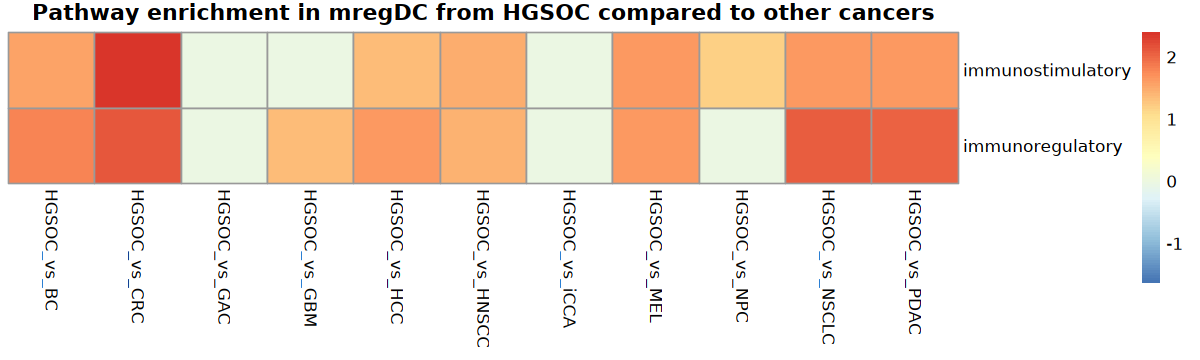

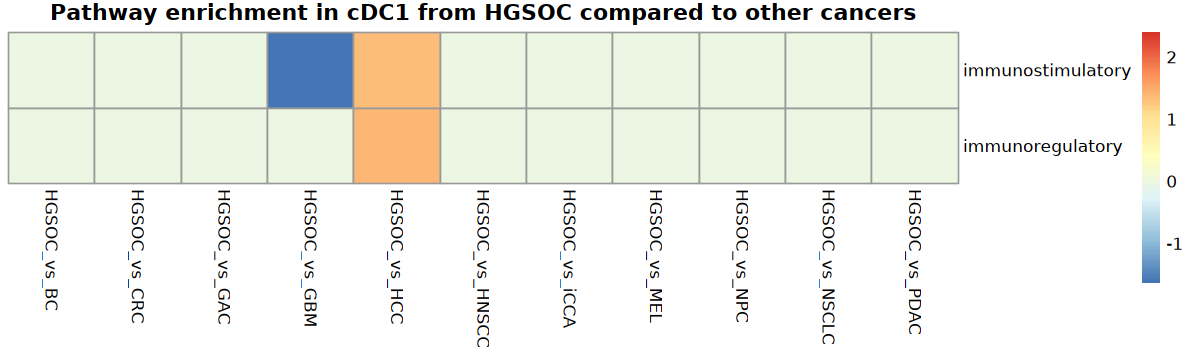

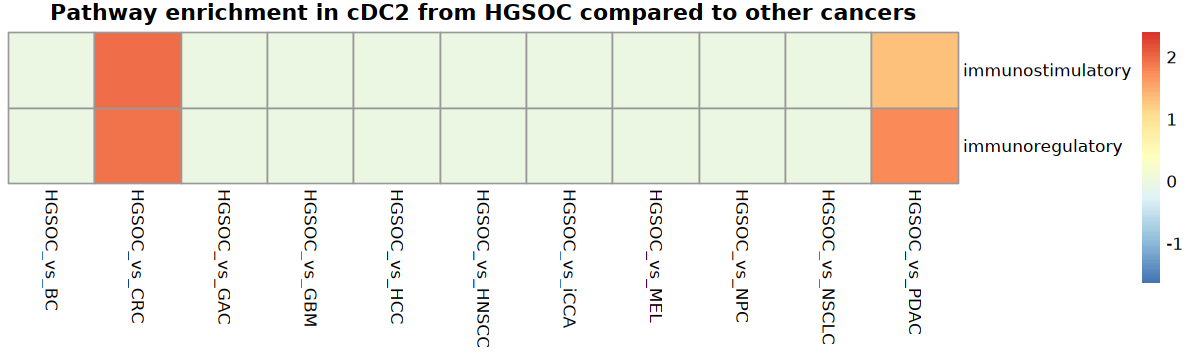

In [289]:
#create heatmap
options(repr.plot.height=3, repr.plot.width=10)

Breaks <- seq(-1.62, 2.4, length = 100)

pheatmap(t(nes_scores_df_mregDC[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         breaks = Breaks,
         main = "Pathway enrichment in mregDC from HGSOC compared to other cancers"    
)

pheatmap(t(nes_scores_df_DC1[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         breaks = Breaks,
         main = "Pathway enrichment in cDC1 from HGSOC compared to other cancers"    
)

pheatmap(t(nes_scores_df_DC2[, c("immunostimulatory", "immunoregulatory")]),  # Select the NES scores columns
         scale = "none",         # No scaling of NES scores
         cluster_rows = FALSE,   
         cluster_cols = FALSE,
         breaks = Breaks,
         main = "Pathway enrichment in cDC2 from HGSOC compared to other cancers"    
)